## 1. Importing Packages

In [1]:
# standard packages
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import scipy
import statistics


# Preprocessing data and hyperparameter
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # preprocessing of data
from sklearn.model_selection import train_test_split, GridSearchCV # data manipulation and hyperparameter searching

# unsupervsied 

from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.manifold import TSNE # dimensionality reduction with clustering

# classification

from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import xgboost as xgb

# neural networks

import tensorflow as tf

# metrics

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')


### 1.1 Loading files in

In [2]:
train_fname = r'../Capstone/icr-identify-age-related-conditions/train.csv'

In [3]:
train = pd.read_csv(train_fname)

## 2. Exploratory Data Analysis

In [4]:
train.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,607,608,609,610,611,612,613,614,615,616
Id,000ff2bfdfe9,007255e47698,013f2bd269f5,043ac50845d5,044fb8a146ec,04517a3c90bd,049232ca8356,057287f2da6d,0594b00fb30a,05f2bc0155cd,...,fb786fb02a65,fbb79ba9d642,fbc241daef00,fbd12c4ae88b,fd1dd68d51b4,fd3dafe738fd,fd895603f071,fd8ef6377f76,fe1942975e40,ffcca4ded3bb
AB,0.209377,0.145282,0.47003,0.252107,0.380297,0.209377,0.348249,0.269199,0.346113,0.324748,...,0.423027,0.636677,0.367478,0.581128,0.175193,0.149555,0.435846,0.4273,0.363205,0.482849
AF,3109.03329,978.76416,2635.10654,3819.65177,3733.04844,2615.8143,1733.65412,966.45483,3238.43674,5188.68207,...,1691.6768,2996.11246,4461.60154,4268.30888,2607.26686,3130.05946,5462.03438,2459.1072,1263.53524,2672.53426
AH,85.200147,85.200147,85.200147,120.201618,85.200147,85.200147,85.200147,85.200147,85.200147,85.200147,...,85.200147,85.200147,85.200147,85.200147,85.200147,123.763599,85.200147,130.138587,85.200147,546.66393
AM,22.394407,36.968889,32.360553,77.112203,14.103738,8.541526,8.377385,21.174189,28.888816,12.968687,...,18.904088,157.135586,25.842917,43.212441,7.067354,9.513984,46.551007,55.355778,23.685856,112.006102
AR,8.138688,8.138688,8.138688,8.138688,8.138688,8.138688,15.31248,8.138688,8.138688,8.138688,...,8.138688,25.533036,8.138688,11.835708,8.138688,13.020852,15.973224,10.005552,8.138688,8.138688
AX,0.699861,3.63219,6.73284,3.685344,3.942255,4.013127,1.913544,4.987617,4.021986,4.593392,...,6.865725,4.934463,5.731773,6.343044,4.030845,3.499305,5.979825,8.070549,7.981959,3.198099
AY,0.025578,0.025578,0.025578,0.025578,0.05481,0.025578,0.025578,0.025578,0.025578,0.025578,...,0.025578,0.025578,0.032277,0.025578,0.025578,0.077343,0.025882,0.025578,0.025578,0.116928
AZ,9.812214,13.51779,12.82457,11.053708,3.396778,12.547282,6.547778,9.408886,8.243016,10.685041,...,13.687944,12.660718,8.44468,7.045636,3.396778,8.545512,12.622906,15.40839,7.524588,3.396778
BC,5.555634,1.2299,1.2299,1.2299,102.15198,1.2299,1.2299,1.2299,3.626448,1.2299,...,3.823232,1.2299,5.882436,11.188576,1.2299,2.804172,3.77755,1.2299,1.2299,7.948668


In [5]:
def analysis_1():    
    null_rows = len([i for i in train.isnull().sum().tolist() if i != 0])
    print('This dataset has been provided by Invitro Cell Research and has been anonymized.')
    print(f'The training dataset has {train.shape[0]} rows and {train.shape[1]-2} trainable features and one target.')
    print(f'Of the {train.shape[1]-2} trainable features, there are {null_rows} rows that contain missing values.')


In [6]:
analysis_1()

This dataset has been provided by Invitro Cell Research and has been anonymized.
The training dataset has 617 rows and 56 trainable features and one target.
Of the 56 trainable features, there are 9 rows that contain missing values.


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [8]:
train.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


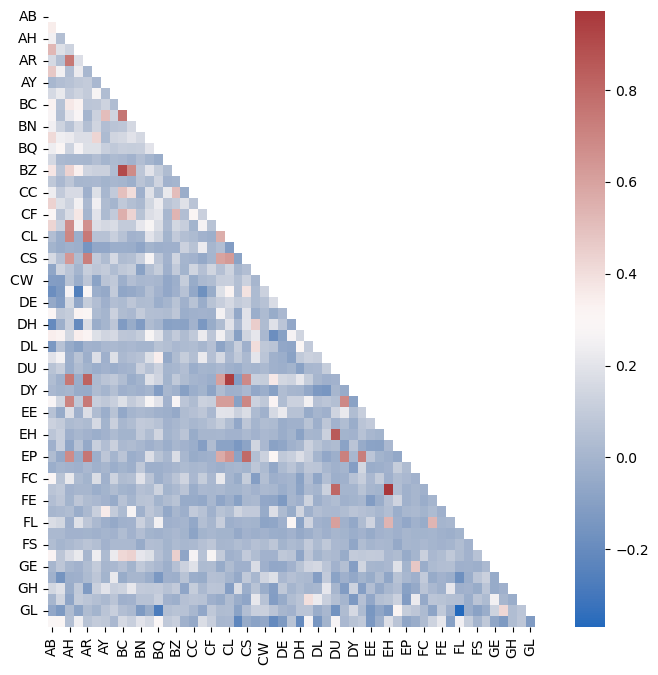

In [9]:
plt.figure(figsize = (8,8))
matrix = train.corr()
mask = np.triu(np.ones_like(train.corr()))
sns.heatmap(data = matrix, cmap = 'vlag', mask = mask);

In [10]:
def find_outliers():
    
    dict_outlier = {}

    for i in train.drop(columns = ['Id','Class','EJ']).columns: #EJ is categorical
        
        below_outlier = 0
        above_outlier = 0
        q1 = train.describe()[i]['25%'] # takes the first quartile of the column
        q2 = train.describe()[i]['50%'] # takes the second quartile of the column
        q3 = train.describe()[i]['75%'] # takes the third quartile of the column
        iqr = q3 - q1 # equation for finding the inner quartile range
        upper_out = q3 + (1.5 * iqr) # the upper whisker outliers
        lower_out = q1 - (1.5 * iqr) # the lower whisker outliers
        
        # determines which points within the columns are outside of the whisker outliers.
        for j in train[i]:
            if (j > upper_out):
                above_outlier += 1
            elif (j < lower_out):
                lower_out += 1
            else:
                continue
            
        dict_outlier[i] = [below_outlier,above_outlier]
    
    return dict_outlier
    

In [11]:
outliers = find_outliers()
outliers

{'AB': [0, 35],
 'AF': [0, 19],
 'AH': [0, 70],
 'AM': [0, 54],
 'AR': [0, 133],
 'AX': [0, 27],
 'AY': [0, 107],
 'AZ': [0, 14],
 'BC': [0, 45],
 'BD ': [0, 15],
 'BN': [0, 0],
 'BP': [0, 33],
 'BQ': [0, 48],
 'BR': [0, 47],
 'BZ': [0, 116],
 'CB': [0, 47],
 'CC': [0, 22],
 'CD ': [0, 37],
 'CF': [0, 38],
 'CH': [0, 27],
 'CL': [0, 74],
 'CR': [0, 21],
 'CS': [0, 31],
 'CU': [0, 19],
 'CW ': [0, 0],
 'DA': [0, 19],
 'DE': [0, 38],
 'DF': [0, 137],
 'DH': [0, 16],
 'DI': [0, 35],
 'DL': [0, 8],
 'DN': [0, 14],
 'DU': [0, 84],
 'DV': [0, 38],
 'DY': [0, 29],
 'EB': [0, 21],
 'EE': [0, 23],
 'EG': [0, 21],
 'EH': [0, 52],
 'EL': [0, 0],
 'EP': [0, 45],
 'EU': [0, 38],
 'FC': [0, 73],
 'FD ': [0, 44],
 'FE': [0, 55],
 'FI': [0, 20],
 'FL': [0, 35],
 'FR': [0, 15],
 'FS': [0, 25],
 'GB': [0, 11],
 'GE': [0, 79],
 'GF': [0, 43],
 'GH': [0, 12],
 'GI': [0, 21],
 'GL': [0, 0]}

In [12]:
# plt.figure(figsize = (30,25))
# sns.histplot(data = train)

In [13]:
# sns.pairplot(data = train)

**Note:** Column EJ is categorical

In [14]:
def categorical_converter():    
    le = LabelEncoder()
    le.fit(train['EJ'])
    categorical_labels = le.transform(train['EJ'])
    return categorical_labels

In [15]:
train['EJ'] = categorical_converter() # converts the EJ column from a categorical data type into a usable numerical type

### 2.1 Addressing Missing values 

**Find rows that have missing values**

In [16]:
def missing_vals():
    missing_values = train.isnull().sum().sort_values(ascending = False)
    var_mv = missing_values[missing_values != 0].index
    return var_mv

def missing_vals_boxplot():
    mv = missing_vals()
    fig, axes = plt.subplots(len(mv), figsize = (10,20), layout = 'tight')
    for ix,i in enumerate(mv):
        sns.boxplot(data = train, x = i, ax = axes[ix]);
        axes[ix].set_title(i)
    return mv

Index(['EL', 'BQ', 'CC', 'FS', 'CB', 'FL', 'FC', 'DU', 'GL'], dtype='object')

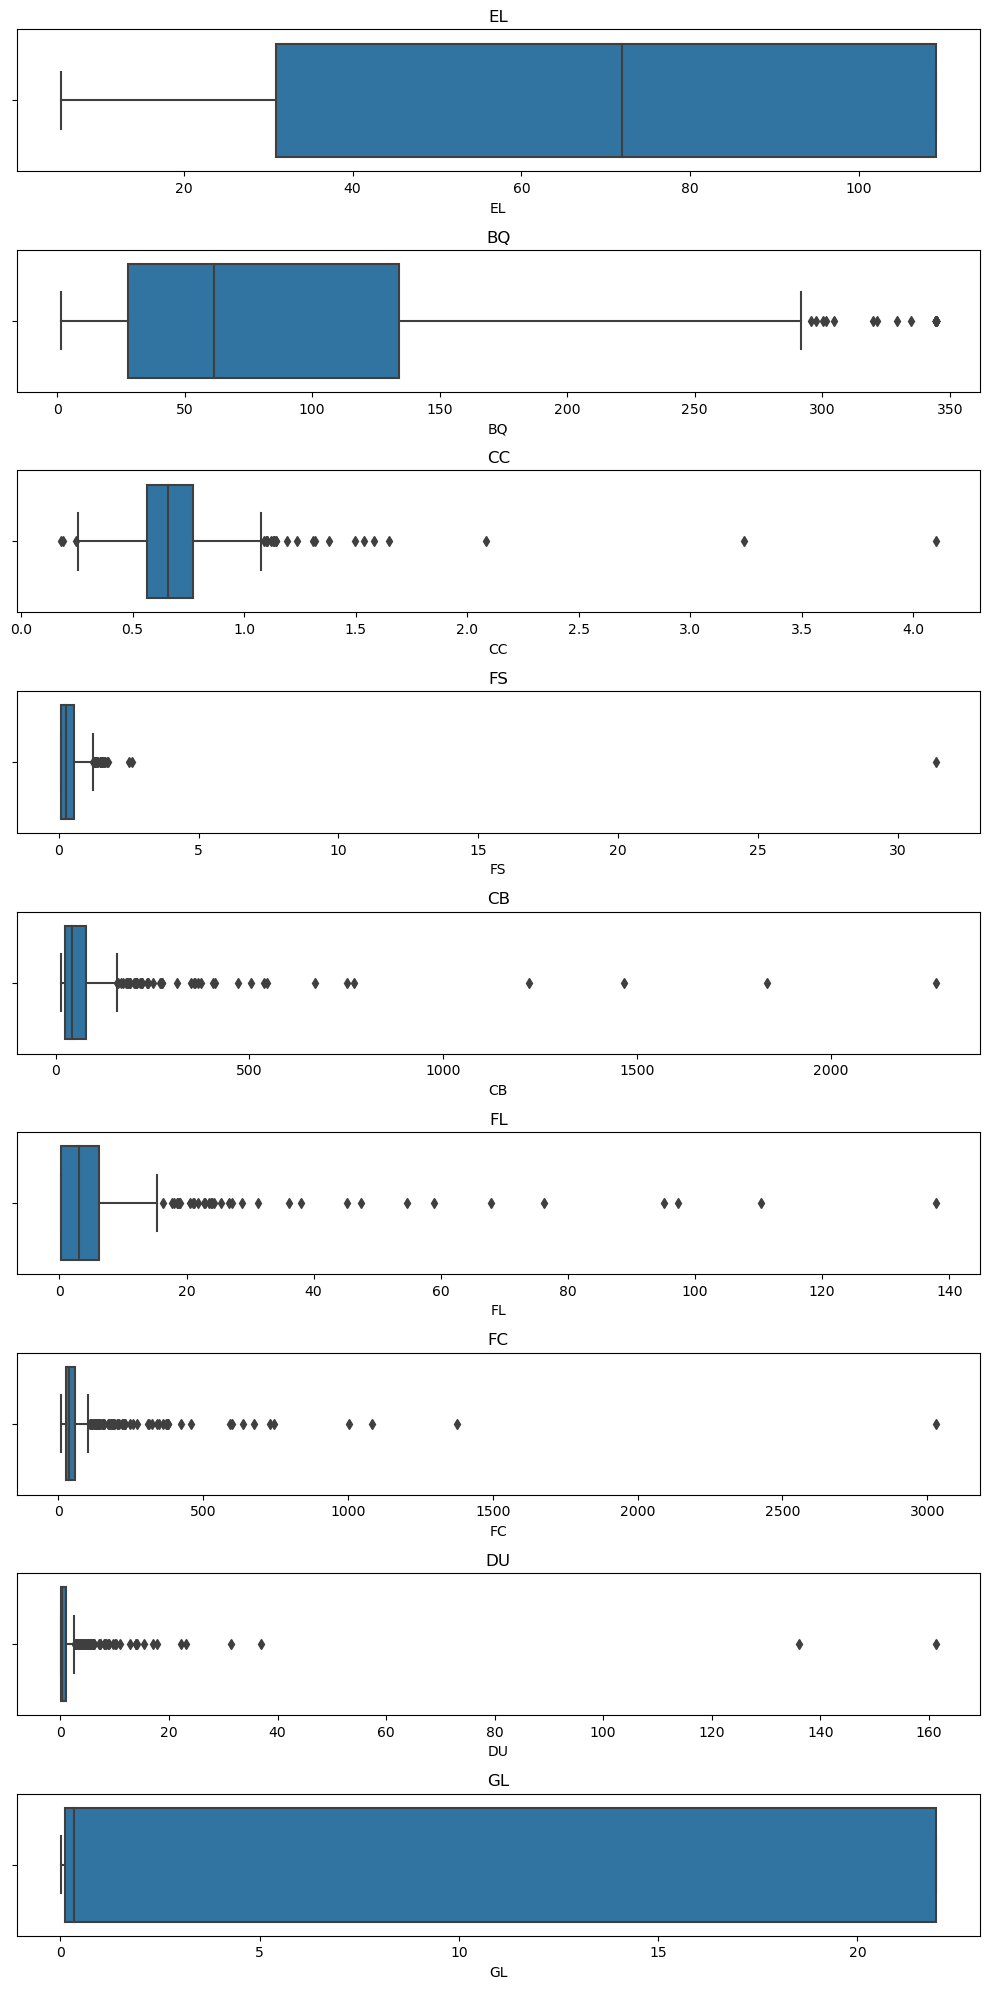

In [17]:
missing_vals_boxplot()

**Address missing values -> replace with median value**

In [18]:
def missing_vals_fill():    
    
    mv = missing_vals()
    # medians = train[mv].describe().T['50%'] # median of each column with missing values
    
    for i in mv:
        median = round(train[i].describe().T['50%'],6) # median value for column
        null = train[i].isnull() == True
        null_index = null[null == True].index
        for j in null_index:
            train[i][j] = median
    
    return mv,train
        

In [19]:
mv, train = missing_vals_fill()

**Address outliers**

**Finding skew of columns w/missing values**

In [20]:
def normal_distribution_check():   
     
    n_dist = {}
    skew = scipy.stats.skewtest # initializing skew method
    for i in train.drop(columns = ['Id','Class']).columns:
        z_score,p_test = skew(a = train[i])
        if p_test >= 0.05:
            n_dist[i] = p_test
        else:
            continue
    
    return n_dist

In [21]:
normal_distribution_check()

{'EL': 0.07787342744700854}

**Note:** Only one column is normally distributed. Outliers can be moved to the upper and lower quartiles rather than using the z-score.

In [22]:
def fix_outliers():

    for i in train.drop(columns = ['Id','Class','EJ']).columns: #EJ is categorical
        
        q1 = train.describe()[i]['25%']
        q2 = train.describe()[i]['50%']
        q3 = train.describe()[i]['75%']
        iqr = q3 - q1
        upper_out = q3 + (1.5 * iqr)
        lower_out = q1 - (1.5 * iqr)
        
        for jx,j in enumerate(train[i]):
            if (j > upper_out):
                train[i][jx] = upper_out
            elif (j < lower_out):
                train[i][jx] = lower_out
            else:
                continue
    
    return train
    

In [23]:
train = fix_outliers() # returns the dataset with fixed outliers
find_outliers() # returns a dictionary that shows outliers of each column

{'AB': [0, 0],
 'AF': [0, 0],
 'AH': [0, 0],
 'AM': [0, 0],
 'AR': [0, 0],
 'AX': [0, 0],
 'AY': [0, 0],
 'AZ': [0, 0],
 'BC': [0, 0],
 'BD ': [0, 0],
 'BN': [0, 0],
 'BP': [0, 0],
 'BQ': [0, 0],
 'BR': [0, 0],
 'BZ': [0, 0],
 'CB': [0, 0],
 'CC': [0, 0],
 'CD ': [0, 0],
 'CF': [0, 0],
 'CH': [0, 0],
 'CL': [0, 0],
 'CR': [0, 0],
 'CS': [0, 0],
 'CU': [0, 0],
 'CW ': [0, 0],
 'DA': [0, 0],
 'DE': [0, 0],
 'DF': [0, 0],
 'DH': [0, 0],
 'DI': [0, 0],
 'DL': [0, 0],
 'DN': [0, 0],
 'DU': [0, 0],
 'DV': [0, 0],
 'DY': [0, 0],
 'EB': [0, 0],
 'EE': [0, 0],
 'EG': [0, 0],
 'EH': [0, 0],
 'EL': [0, 0],
 'EP': [0, 0],
 'EU': [0, 0],
 'FC': [0, 0],
 'FD ': [0, 0],
 'FE': [0, 0],
 'FI': [0, 0],
 'FL': [0, 0],
 'FR': [0, 0],
 'FS': [0, 0],
 'GB': [0, 0],
 'GE': [0, 0],
 'GF': [0, 0],
 'GH': [0, 0],
 'GI': [0, 0],
 'GL': [0, 0]}

### 2.3 Further Data Exploration

In [24]:
def distribution_plot():
    for i in train.drop(columns = ['Id','Class']).columns:
        sns.displot(data = train, x = i, hue = 'Class');

def class_distribution():
    train['Class'].value_counts().plot(kind = 'bar', xlabel = 'Class Output', ylabel = 'Count');

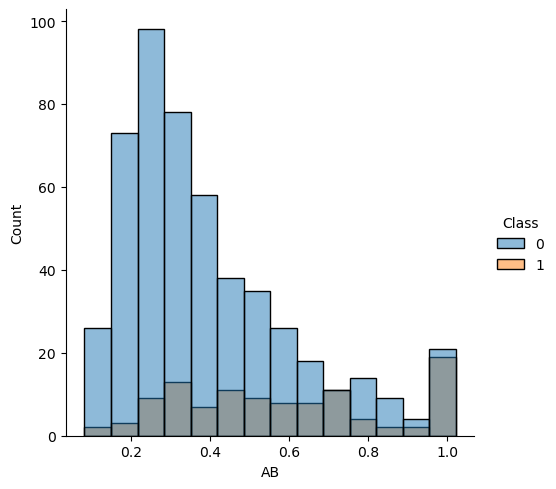

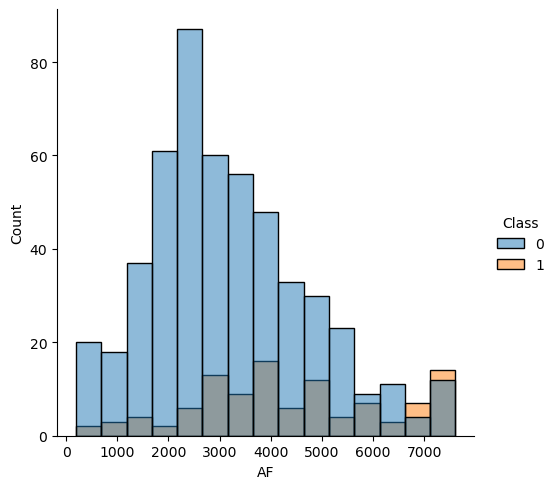

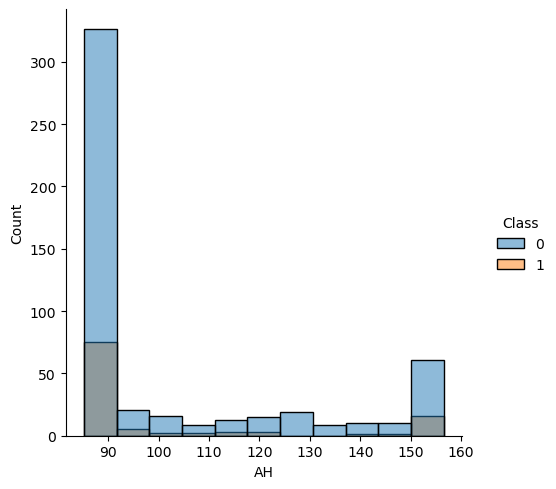

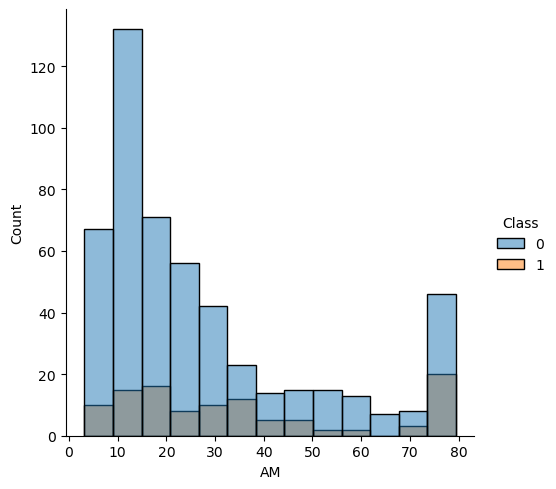

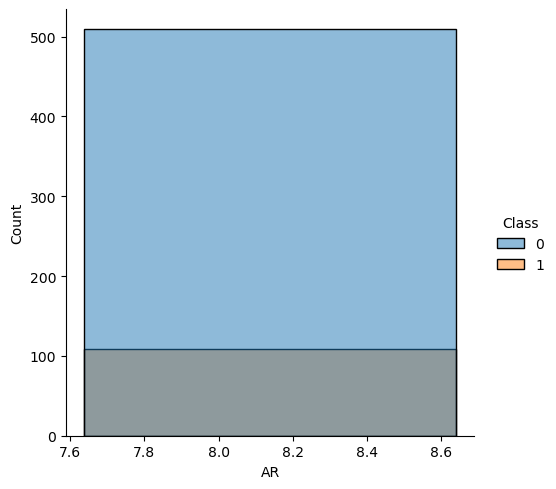

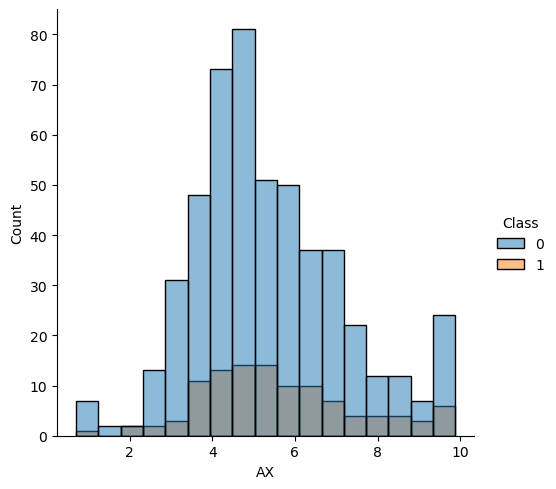

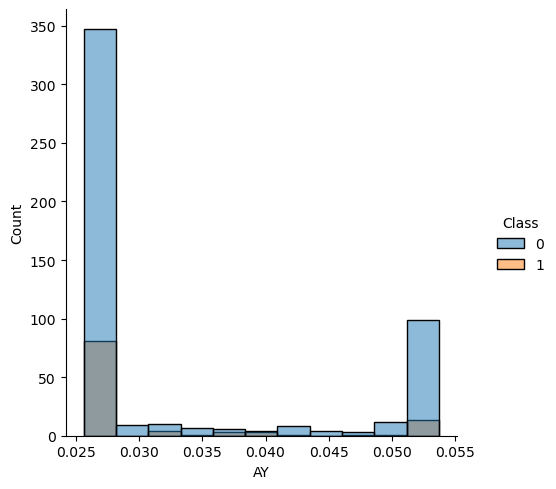

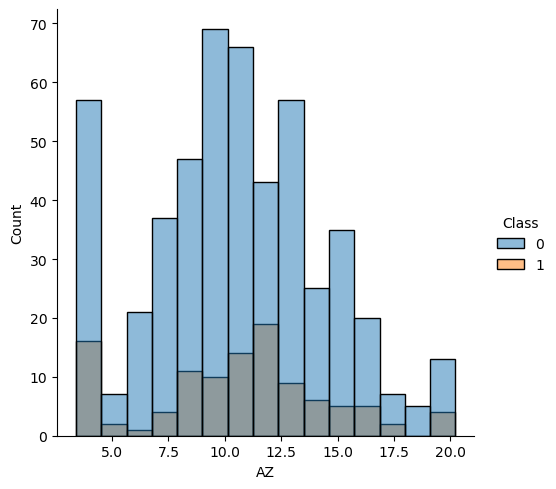

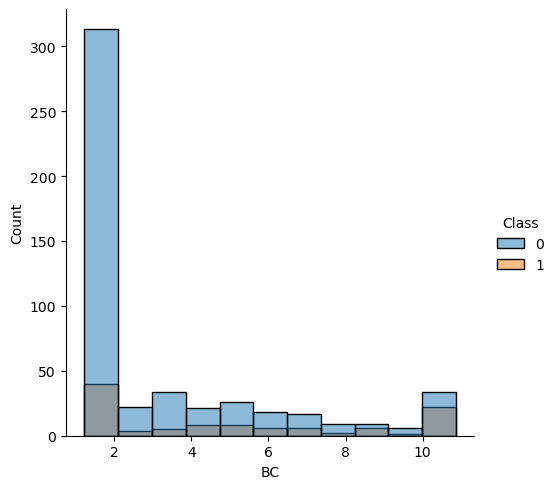

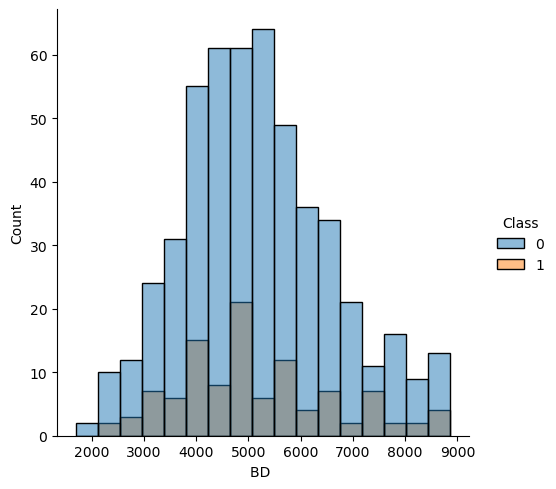

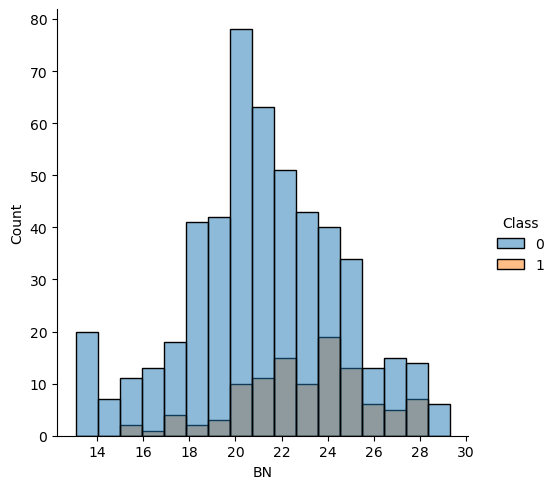

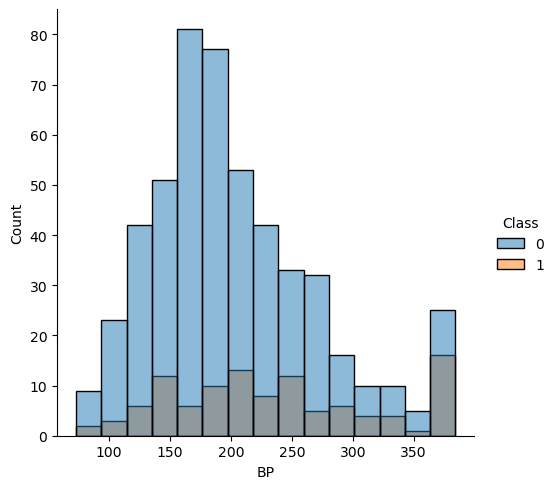

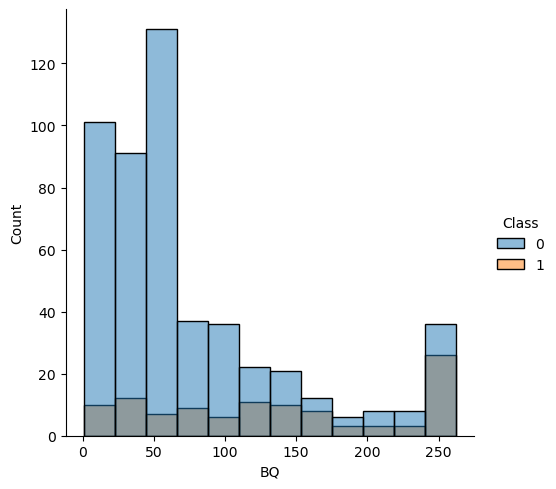

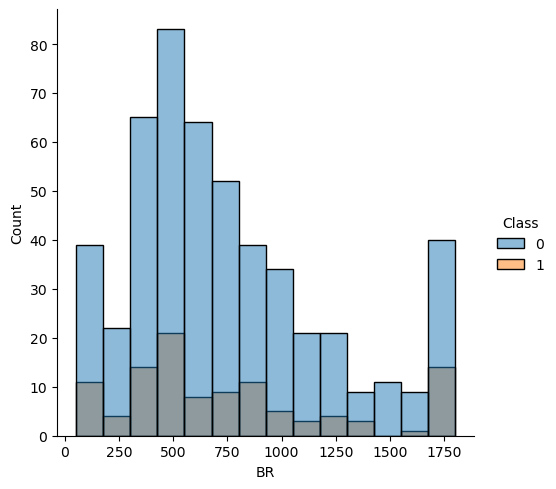

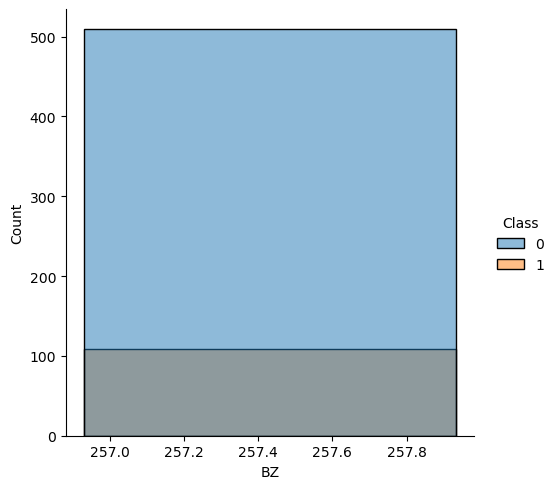

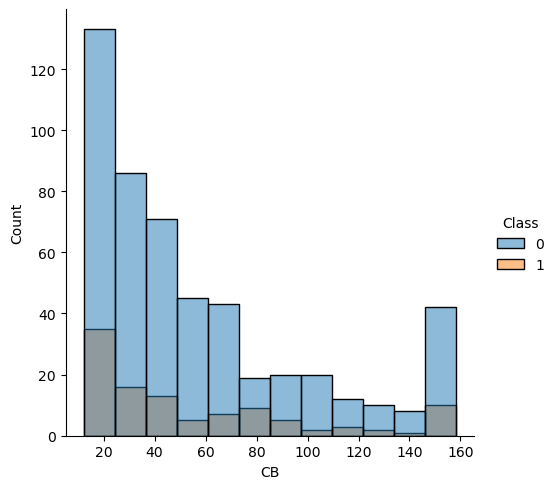

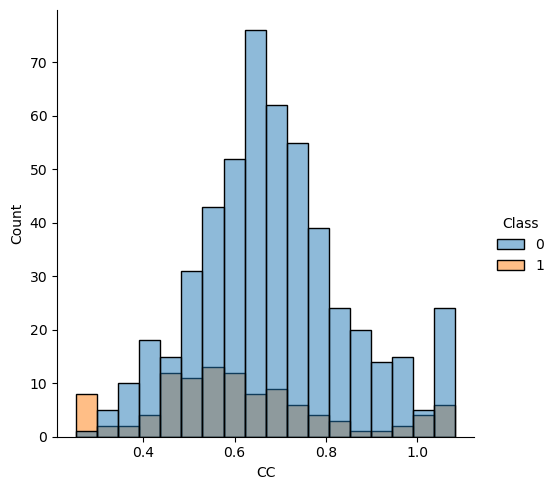

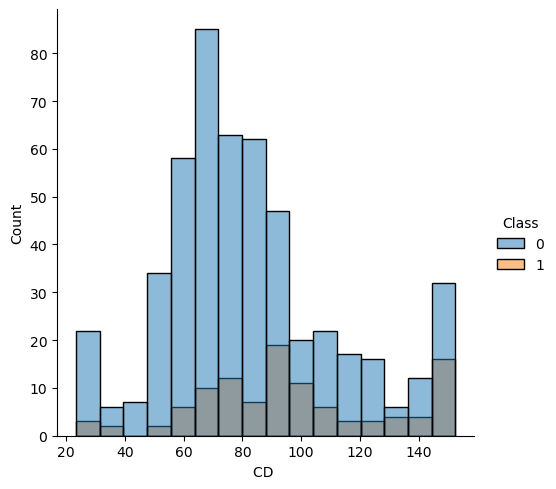

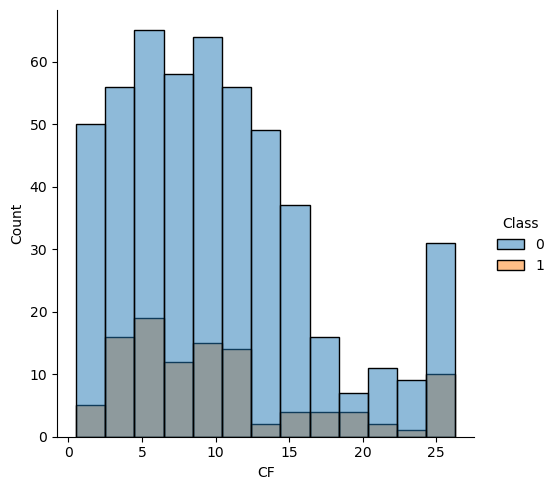

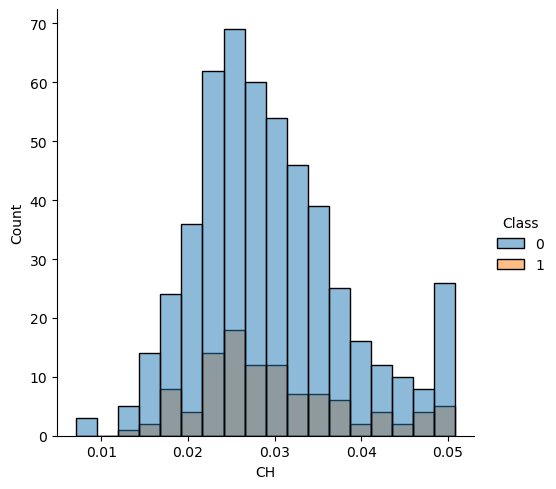

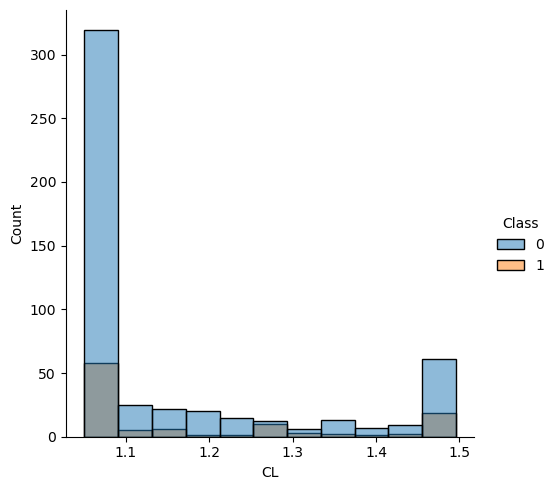

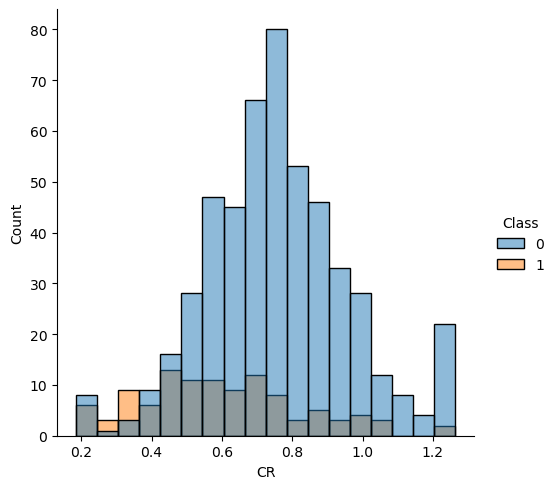

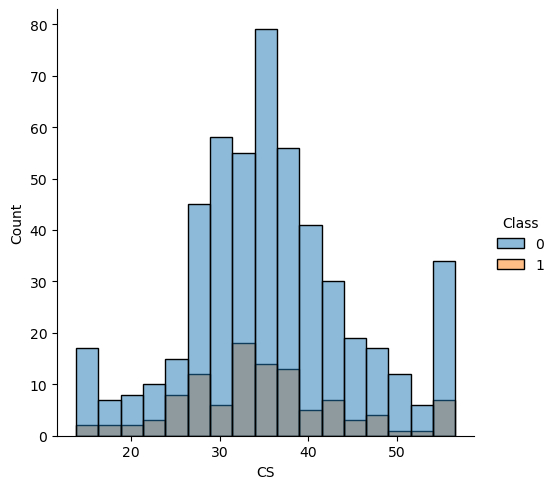

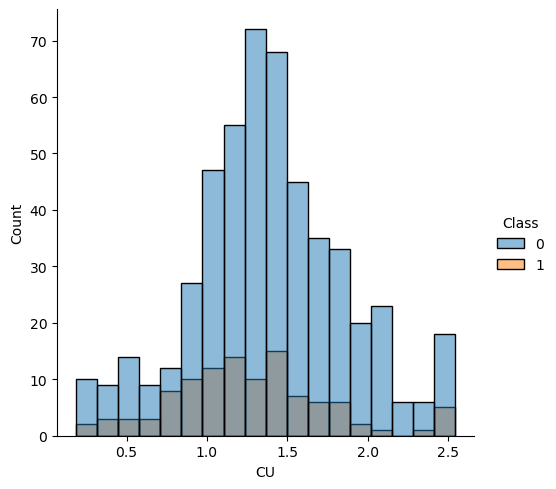

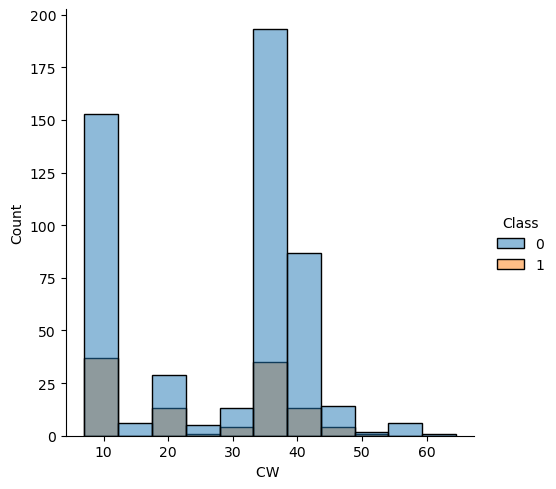

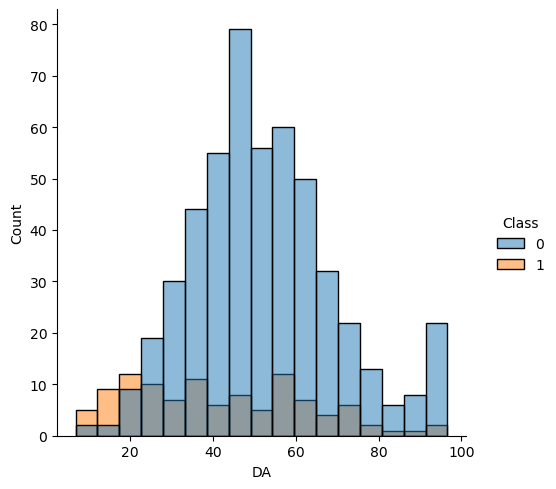

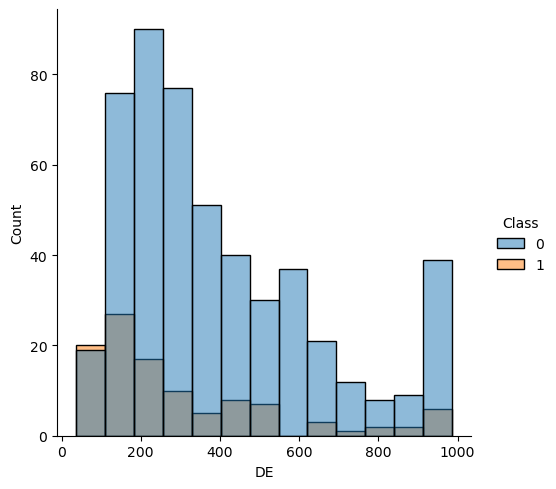

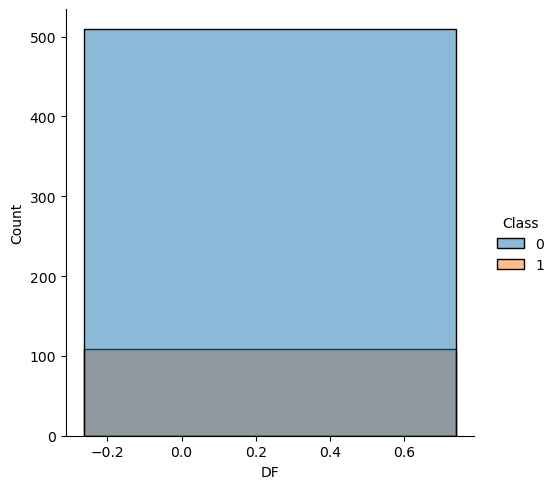

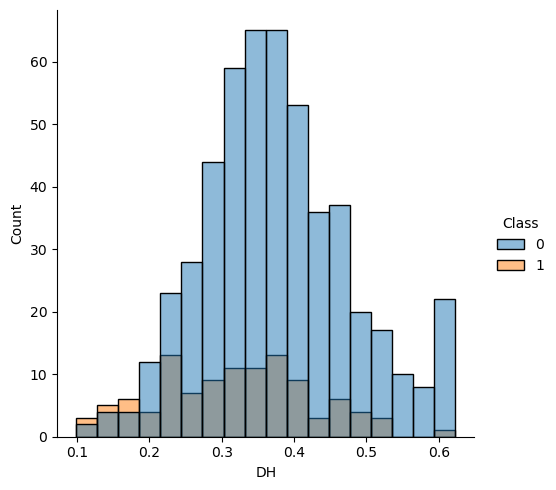

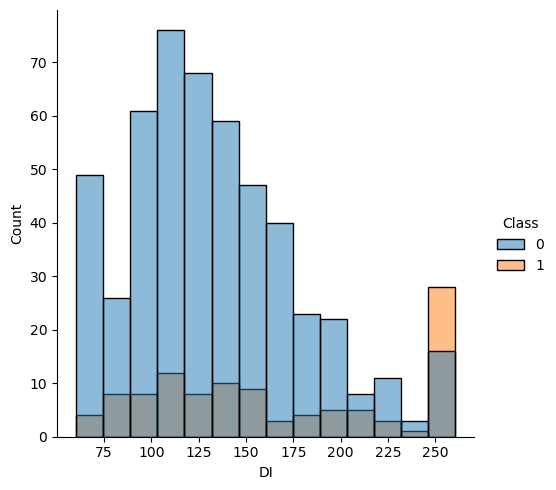

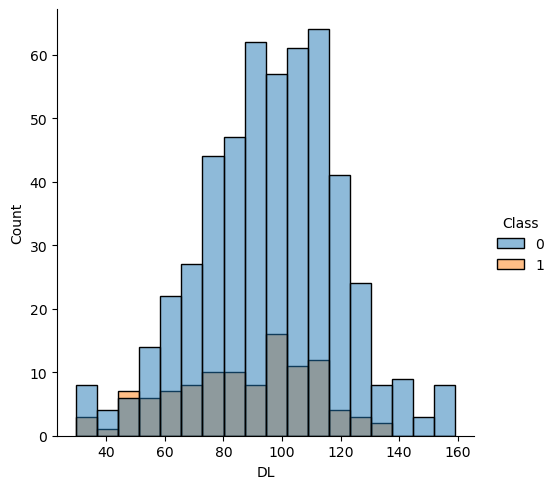

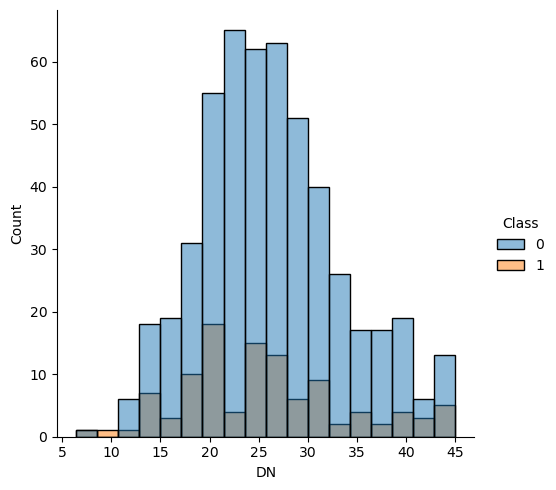

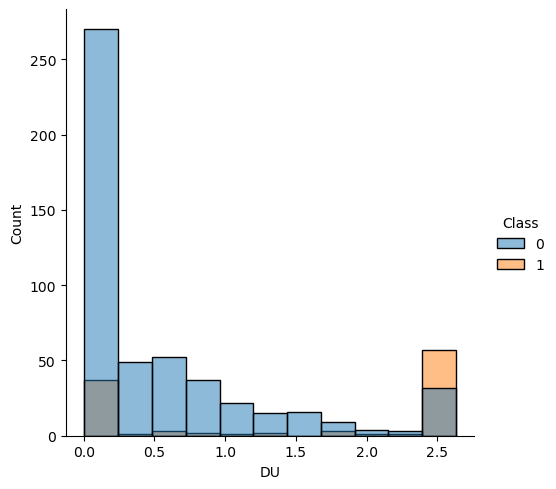

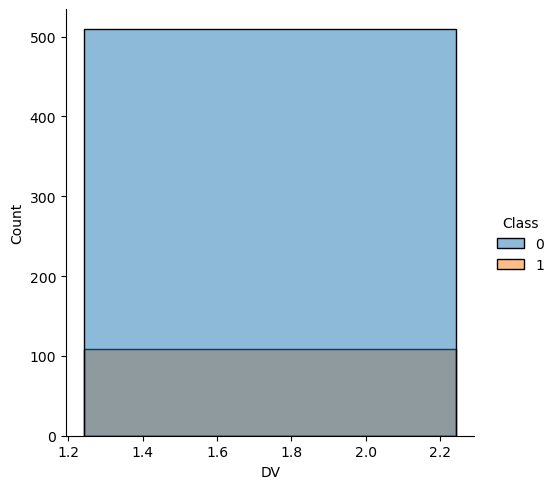

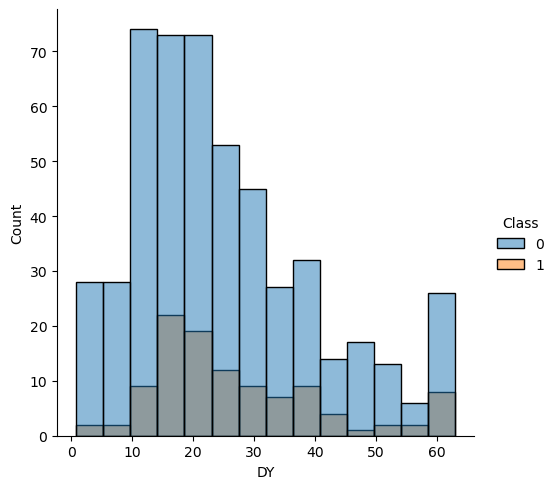

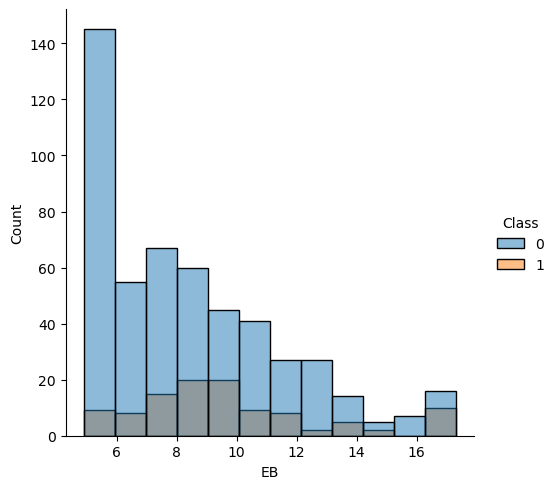

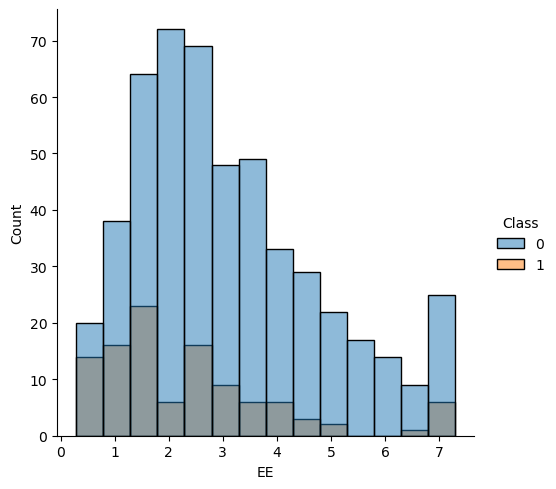

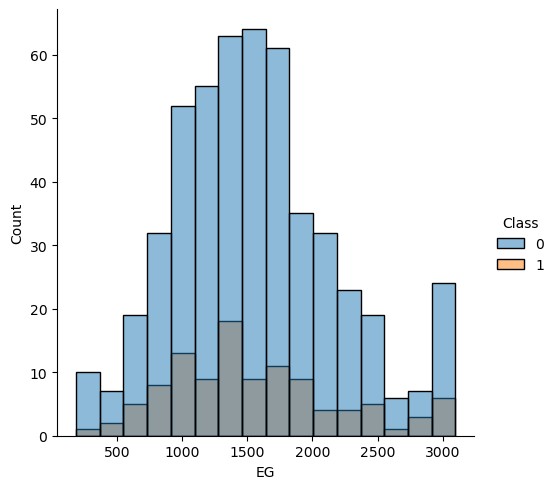

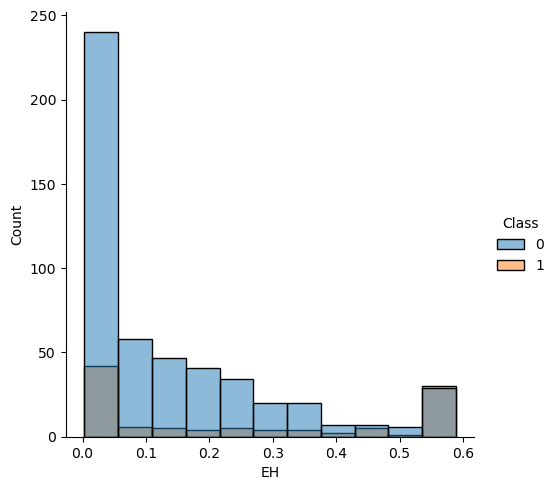

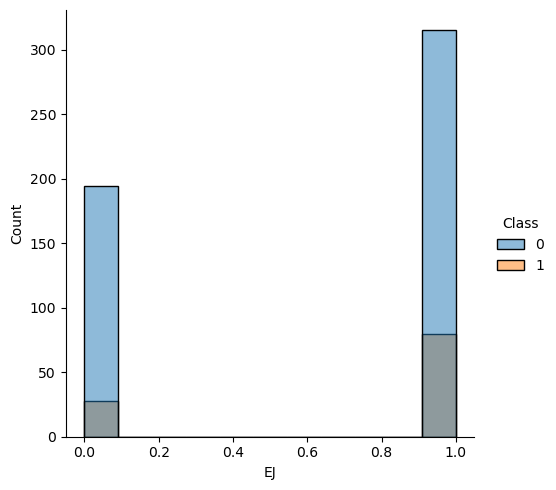

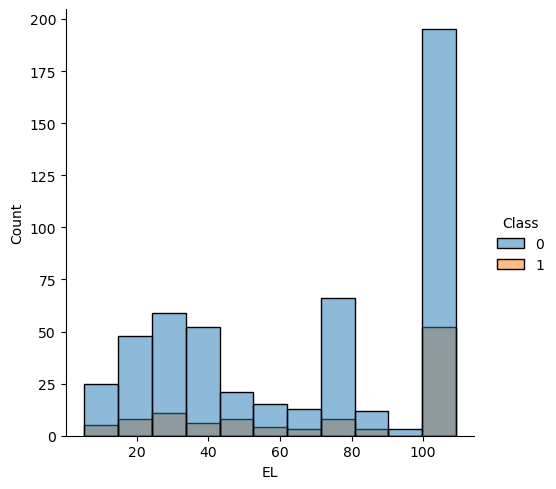

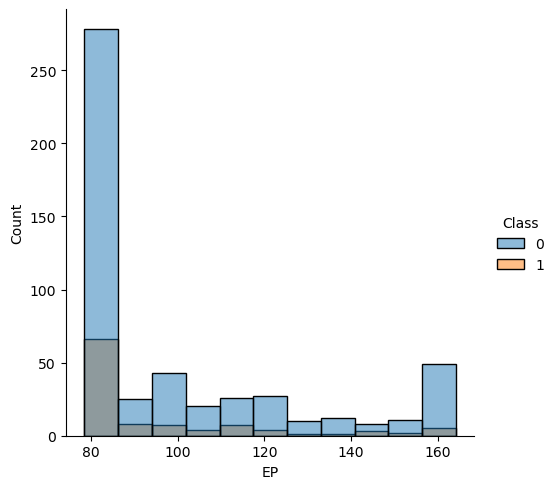

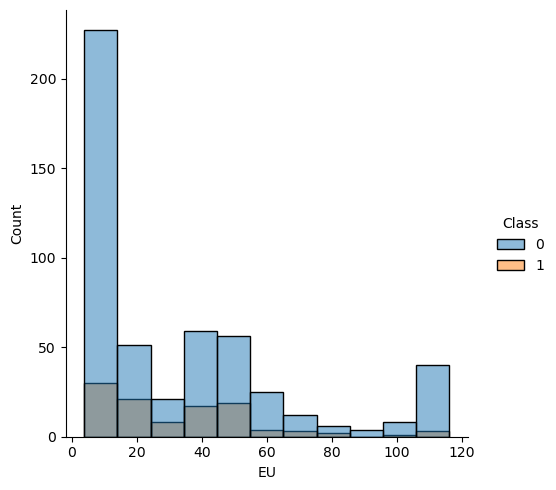

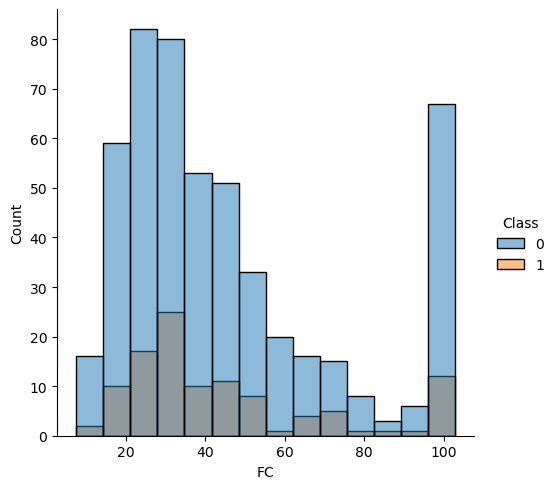

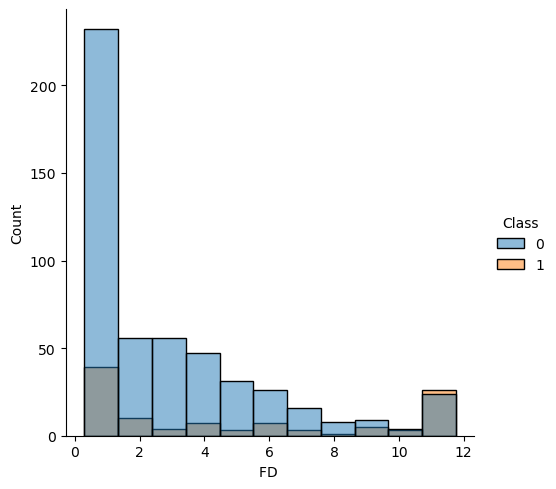

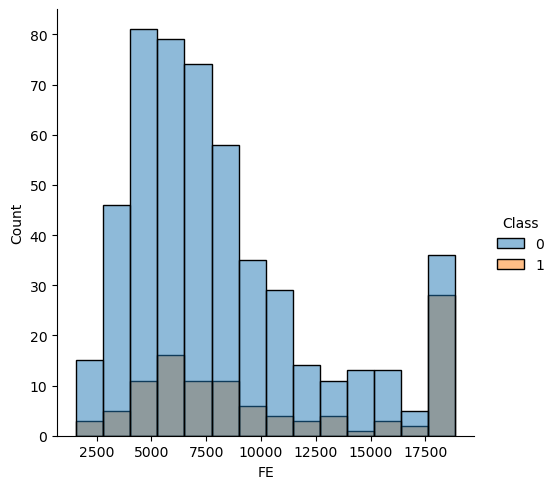

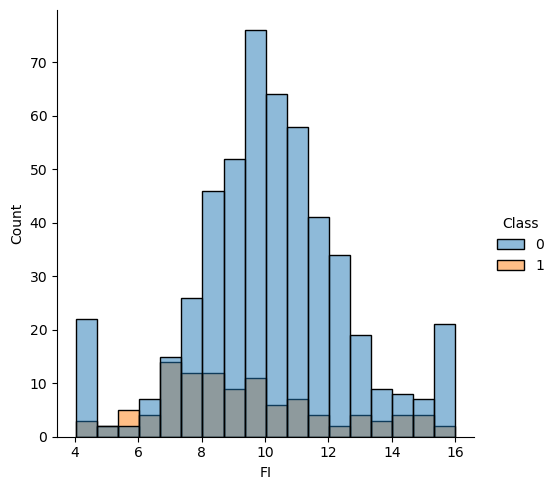

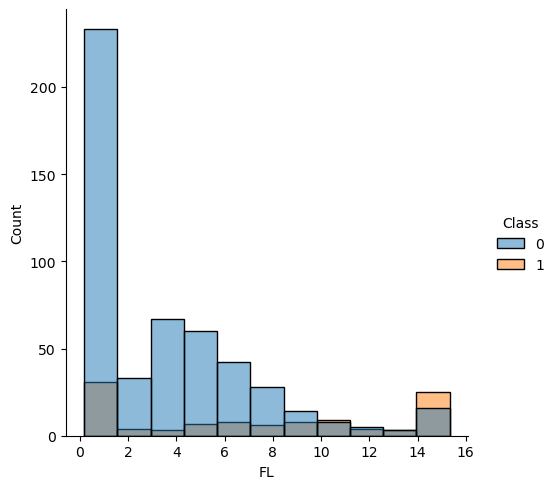

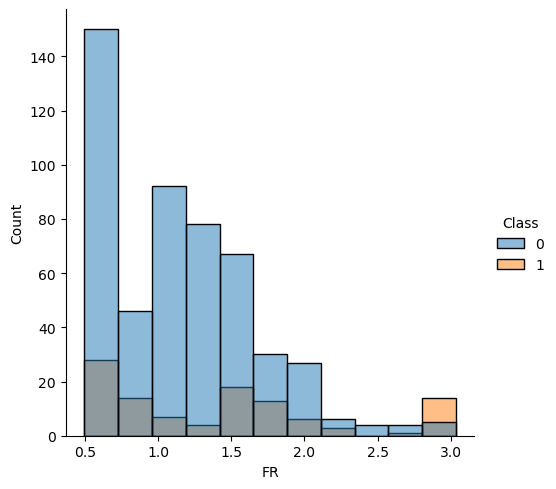

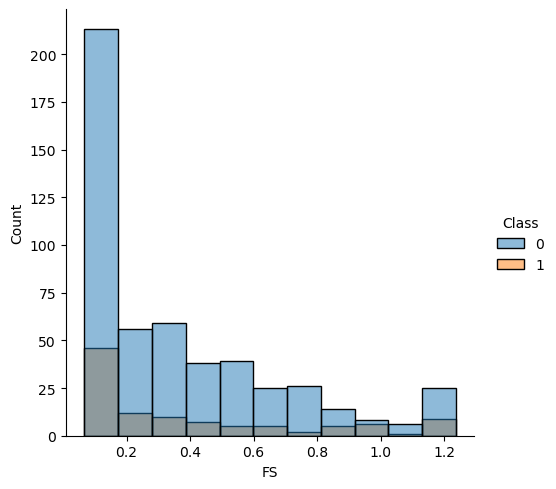

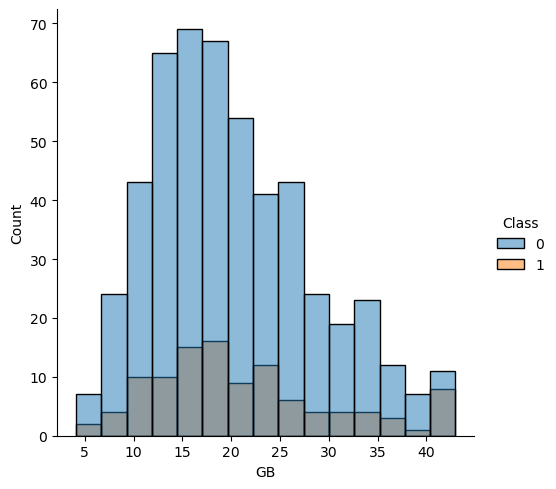

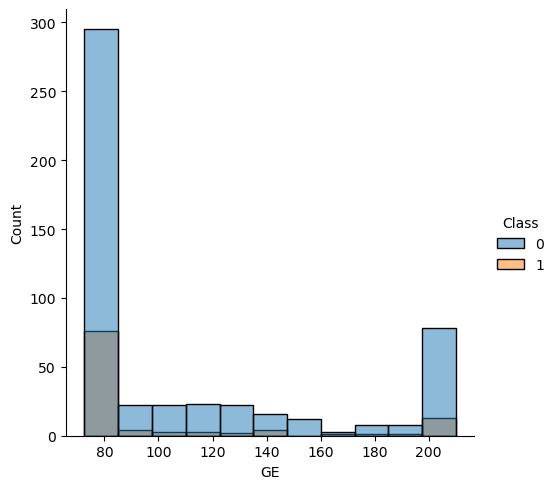

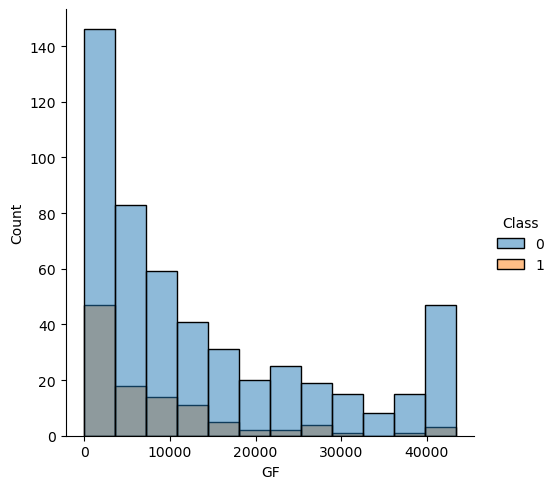

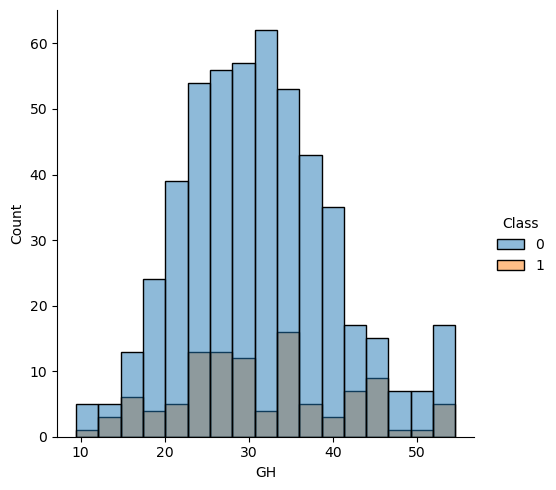

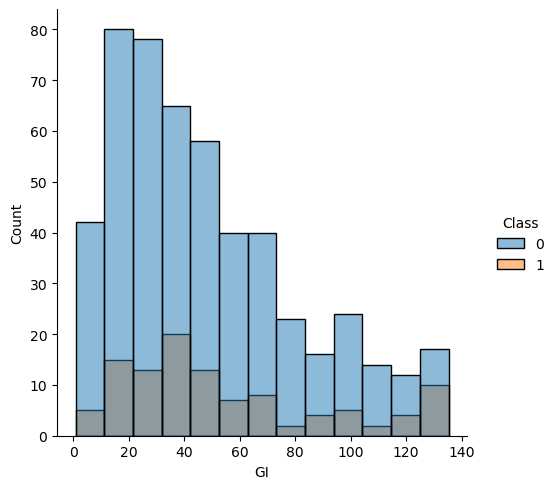

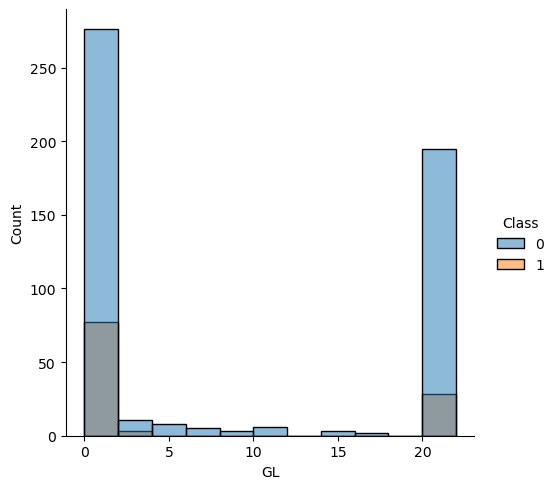

In [25]:
distribution_plot()

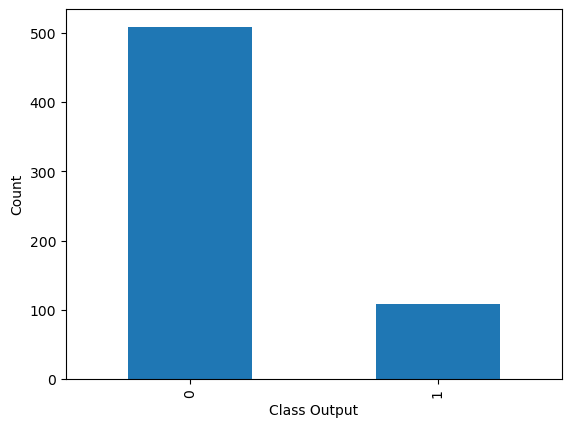

In [26]:
class_distribution()

### 2.4 Unsupervsied Machine Learning

**Preparing the data**

In [27]:
### standardizing the data

def standardize_df(dataframe):
    scaler = StandardScaler() # initialized the standardizing transformer
    if ('Id' in dataframe.columns) and ('Class' in dataframe.columns):
        # if the dataframe has the ID and Class columns, it drops the columns (can't standardize these columns)
        scaled = scaler.fit_transform(X = dataframe.drop(columns = ['Id','Class'])) 
        
    else:
        # standardizes the dataframe 
        scaled = scaler.fit_transform(X = dataframe) 
    train_scaled = pd.DataFrame(data = scaled, columns = dataframe.drop(columns = ['Id','Class']).columns)
    return train_scaled # returns a standardized dataframe

def log_transform_df(dataframe):
    df = np.log(dataframe)
    return df # log transforms all values within the dataframe

In [28]:
train_log = log_transform_df(train.drop(columns = ['Id','Class'])) # log transformation of the dataset
train_scaled = standardize_df(train) # scaled training dataset

**PCA (dimensionality reduction)**

In [29]:
def pca_df(dataframe,n_comps = 10):
    pca = PCA(n_components = n_comps, random_state = 42)
    train_pca = pd.DataFrame(data = pca.fit_transform(X = dataframe))
    return pca,train_pca

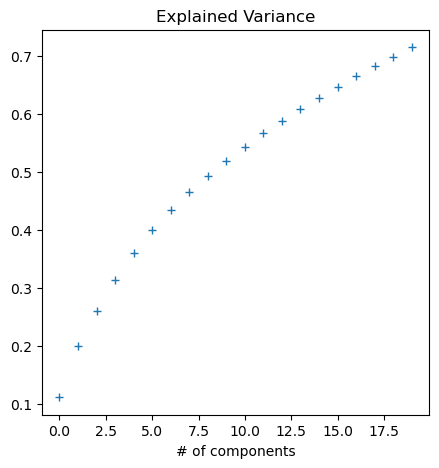

In [30]:
pca, train_pca = pca_df(train_scaled, n_comps = 20)
plt.figure(figsize = (5,5))
plt.plot(np.arange(len(train_pca.columns)),pca.explained_variance_ratio_.cumsum(),'+', linewidth = 2)
plt.title('Explained Variance')
plt.xlabel('# of components');

**Note:**

20 feature components is unable to provide over 80% variance. PCA might not be the proper way to reduce the dimensionality.

In [31]:
### The idea here is to see the features and their principal axes and the direction of there maximum varience within each eigen vector. It will show the features that have the most variance of each PCA vector

dataframe = train.iloc[:,1:-1] # Takes all the training 
pca = PCA(n_components = 20, random_state = 42)
pca_dataframe = pd.DataFrame(data = pca.fit_transform(dataframe))
pd.DataFrame(pca.components_, columns = dataframe.columns).T.style.highlight_max(color = 'green', axis = 0).highlight_min(color = 'red', axis = 0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
AB,-0.000001,0.000004,0.000038,0.000015,0.000121,0.000043,-0.000038,0.000620,0.000362,-0.000195,-0.001191,0.000349,-0.000435,0.002878,-0.000516,0.000829,0.001523,0.000792,-0.000276,0.000939
AF,-0.025526,0.053985,0.979011,-0.178432,-0.074340,0.003930,0.018429,-0.012559,-0.001357,-0.007135,0.001537,0.005027,-0.000263,-0.000621,0.001046,-0.000304,-0.002979,0.000473,-0.000395,0.000591
AH,-0.000139,-0.000249,0.000750,0.001801,0.003671,0.003782,0.010314,-0.001056,0.066064,-0.040282,-0.042443,0.009101,0.020694,0.397130,0.205484,0.304070,0.018049,0.213914,0.753214,-0.233875
AM,0.000055,0.000338,0.001952,0.000583,0.006192,0.004185,-0.005355,0.072837,0.009195,0.007969,-0.122177,0.048011,-0.068578,0.286894,-0.237524,-0.032304,0.041350,-0.057947,0.181928,0.369927
AR,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000
AX,0.000011,-0.000000,0.000186,0.000133,0.000513,0.000310,0.000596,0.002739,0.002587,0.002638,-0.001070,-0.006168,0.001286,0.013876,-0.006140,-0.000091,0.010809,-0.006814,0.003318,0.000500
AY,-0.000000,0.000000,-0.000001,-0.000000,-0.000002,0.000000,-0.000000,0.000008,0.000030,0.000007,-0.000009,0.000016,0.000047,0.000044,0.000175,-0.000059,-0.000039,-0.000069,0.000035,0.000059
AZ,0.000069,-0.000028,0.000626,0.000420,0.000929,0.000106,0.000636,0.000371,-0.002104,0.004907,0.001414,-0.005110,0.009392,0.007634,-0.002214,0.008953,0.004293,0.010866,0.020422,-0.009878
BC,0.000003,0.000111,0.000193,0.000099,0.000198,0.000014,-0.000819,0.006227,0.004748,-0.001286,-0.009316,0.003375,0.006630,0.007319,0.021903,-0.012343,-0.010415,-0.011278,0.004412,0.019253
BD,0.009642,-0.026150,0.171955,0.977981,-0.109837,0.018322,-0.024615,-0.003836,-0.010987,0.006494,-0.001055,0.002194,-0.001787,0.001150,0.001751,-0.001336,-0.000164,0.000738,-0.001055,0.001083


**Note:** Because the explained variance of 20 features does not describe atleast 80% of the data, the component score does not provide an accurate representation of important column features. However it is interesting to note which  columns provide more variance in each principal component. I can use this information to find which columns have a larger impact on the principal component varience within the dataset.

**TSNE**

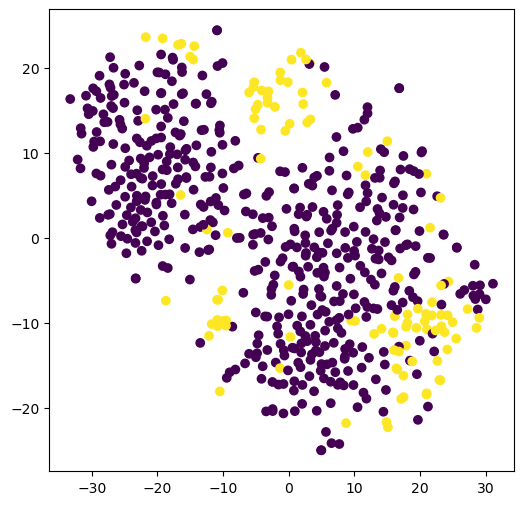

In [32]:
tsne = TSNE(n_components = 2, random_state = 42)
train_tsne = pd.DataFrame(data = tsne.fit_transform(train_scaled))
plt.figure(figsize = (6,6))
plt.scatter(train_tsne[0], train_tsne[1], c = train['Class']);

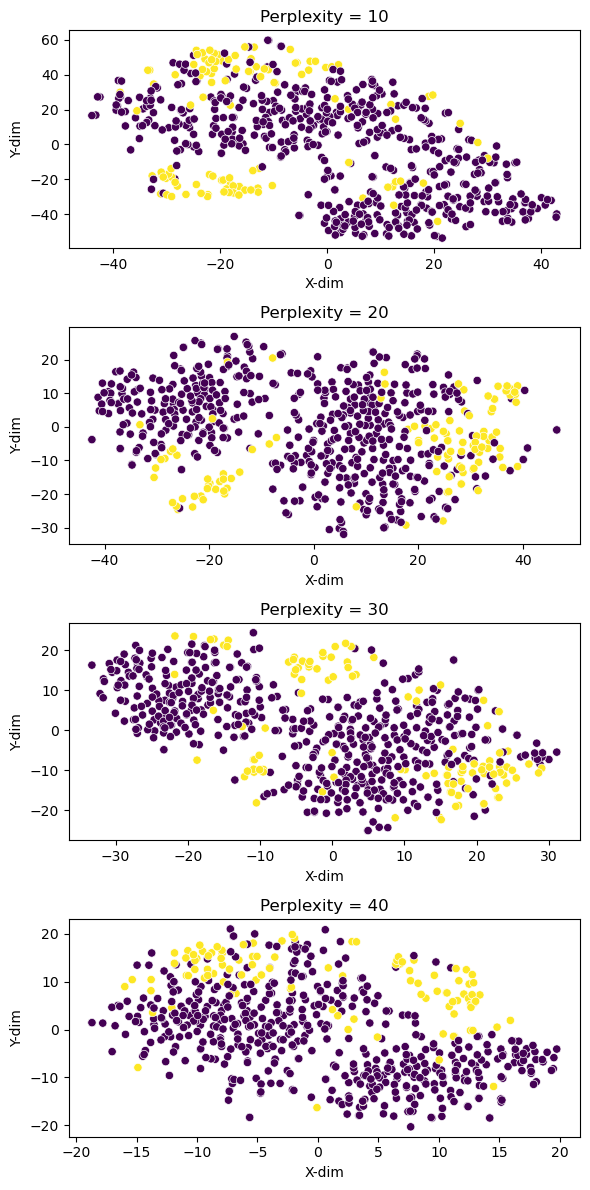

In [33]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (6,12))
for ix,i in enumerate(np.arange(10,50,10)):
    tsne = TSNE(n_components = 2, perplexity = i, random_state = 42)
    tsne_table = pd.DataFrame(tsne.fit_transform(train_scaled))
    sns.scatterplot(x = tsne_table[0], y =tsne_table[1], c = train['Class'], ax = axes[ix])
    axes[ix].set(xlabel = 'X-dim', ylabel = 'Y-dim')
    axes[ix].set_title(f'Perplexity = {i}')
    fig.tight_layout();

### 2.5 Autoencoder

This autoencoder will be used as a means to reduce the dimension into a latent space.

In [34]:
def autoencoder_data():
    
    X = train.drop(columns = ['Id','Class'])
    y = train['Class']
    
    scaler = MinMaxScaler()
    X = pd.DataFrame(data = scaler.fit_transform(X), columns = X.columns)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42) # do not need targets - autoencoders for dim reduction uses itself as the target

    return X_train, X_test

def log_autoencoder_data():
    
    X = train.drop(columns = ['Id','Class','EJ'])
    y = train['Class']
    
    X = pd.DataFrame(data = np.log(X), columns = X.columns)
    
    scaler = MinMaxScaler()
    
    X = pd.DataFrame(data = scaler.fit_transform(X), columns = X.columns)
    
    X['EJ'] = train['EJ']
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)
    
    return X_train, X_test
    

In [35]:
X_train, X_test = autoencoder_data()
X_log_train, X_log_test = log_autoencoder_data()

In [36]:
### building the autoencoder

def autoencoder():
    # latent space dimension

    encoding_dim = 16

    # encoder 

    encoder_input = tf.keras.Input(shape = (X_train.shape[1],))
    encoder_dense1 = tf.keras.layers.Dense(units = 1028, activation = 'relu')(encoder_input)
    encoder_dense2 = tf.keras.layers.Dense(units = 512, activation = 'relu')(encoder_dense1)
    encoder_dense3 = tf.keras.layers.Dense(units = 128, activation = 'relu')(encoder_dense2)
    encoder_dense4 = tf.keras.layers.Dense(units = 32, activation = 'relu')(encoder_dense3)

    # latent space
    latent_space = tf.keras.layers.Dense(units = encoding_dim, activation = 'relu')(encoder_dense4)

    decoder_dense1 = tf.keras.layers.Dense(units = 32, activation = 'relu')(latent_space)
    decoder_dense2 = tf.keras.layers.Dense(units = 128, activation = 'relu')(decoder_dense1)
    decoder_dense3 = tf.keras.layers.Dense(units = 512, activation = 'relu')(decoder_dense2)
    decoder_dense4 = tf.keras.layers.Dense(units = 1028, activation = 'relu')(decoder_dense3)

    decoder_output = tf.keras.layers.Dense(units = X_train.shape[1], activation = 'sigmoid')(decoder_dense4)

    autoencoder = tf.keras.Model(inputs = encoder_input, outputs = decoder_output)
    
    encoder = tf.keras.Model(inputs = encoder_input, outputs = latent_space)
                             
    return autoencoder, encoder

In [37]:
autoencoder, encoder = autoencoder()

In [38]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 56)]              0         
                                                                 
 dense (Dense)               (None, 1028)              58596     
                                                                 
 dense_1 (Dense)             (None, 512)               526848    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 32)                544   

In [39]:
### compile and fit the autoencoder model

autoencoder.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse','acc']
)

b_size = 32
v_size = 0.20 
epoch = 500

history = autoencoder.fit(
    x = X_train,
    y = X_train,
    epochs = epoch,
    batch_size = b_size,
    validation_split = v_size
)

Epoch 1/500


2023-10-24 20:28:19.783579: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


13/13 [==============================] - 0s 14ms/step - loss: 0.0892 - mse: 0.0892 - acc: 0.1168 - val_loss: 0.0811 - val_mse: 0.0811 - val_acc: 0.0202
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0734 - mse: 0.0734 - acc: 0.1041 - val_loss: 0.0755 - val_mse: 0.0755 - val_acc: 0.1616
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0684 - mse: 0.0684 - acc: 0.1193 - val_loss: 0.0664 - val_mse: 0.0664 - val_acc: 0.2424
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0595 - mse: 0.0595 - acc: 0.1751 - val_loss: 0.0601 - val_mse: 0.0601 - val_acc: 0.1515
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0565 - mse: 0.0565 - acc: 0.1624 - val_loss: 0.0576 - val_mse: 0.0576 - val_acc: 0.1616
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0544 - mse: 0.0544 - acc: 0.1701 - val_loss: 0.0569 - val_mse: 0.0569 - val_acc: 0.1616
Epoch 7/500
13/13 [==============

In [40]:
recap = history.history

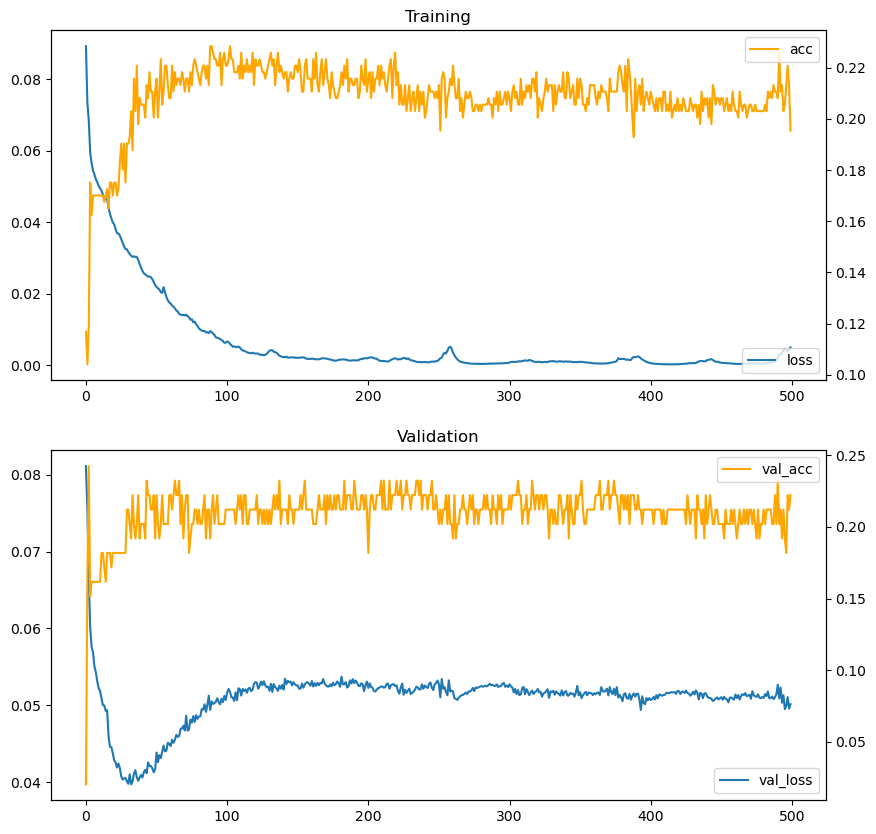

In [41]:
fig, ax = plt.subplots(2, figsize = (10,10))

ax1 = ax[0].twinx()
ax[0].plot(np.arange(len(recap['loss'])), recap['loss'],label = 'loss')
ax1.plot(np.arange(len(recap['acc'])), recap['acc'], c = 'orange', label = 'acc')
ax[0].set_title('Training') 
ax[0].legend(loc = 'lower right')
ax1.legend(loc = 'upper right')

ax2 = ax[1].twinx()
ax[1].plot(np.arange(len(recap['val_loss'])), recap['val_loss'], label = 'val_loss')
ax2.plot(np.arange(len(recap['val_acc'])), recap['val_acc'], c = 'orange', label = 'val_acc')
ax[1].set_title('Validation')
ax[1].legend(loc = 'lower right')
ax2.legend(loc = 'upper right')
plt.show()

**Note:** Try with reduced dimensional space

In [42]:
X_train_encoder = pd.DataFrame(encoder.predict(X_train))
X_train_encoder
X_test_encoder = pd.DataFrame(encoder.predict(X_test))
X_test_encoder

4/4 [==============================] - 0s 1ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,18.675058,8.348761,11.350592,0.000000,0.0,8.593446,0.0,10.720485,0.0,0.0,12.510304,0.0,7.384374,0.0,0.0,0.0
1,2.826412,7.837246,7.742187,0.000000,0.0,9.971201,0.0,6.311694,0.0,0.0,12.282982,0.0,2.371437,0.0,0.0,0.0
2,4.872968,2.877154,6.320368,0.651254,0.0,2.152473,0.0,7.302552,0.0,0.0,0.000000,0.0,11.952809,0.0,0.0,0.0
3,10.727545,2.370808,5.874459,0.000000,0.0,9.396938,0.0,10.549496,0.0,0.0,9.249295,0.0,7.599290,0.0,0.0,0.0
4,19.715685,8.034650,7.799990,0.000000,0.0,14.339200,0.0,16.794525,0.0,0.0,18.343855,0.0,11.671388,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12.026220,2.345116,11.712008,2.293044,0.0,4.577195,0.0,2.960808,0.0,0.0,0.000000,0.0,12.531595,0.0,0.0,0.0
120,7.582710,2.631726,10.425396,0.000000,0.0,1.595418,0.0,8.459496,0.0,0.0,10.246558,0.0,0.188380,0.0,0.0,0.0
121,10.197644,5.613778,8.166937,1.714134,0.0,5.128357,0.0,6.481619,0.0,0.0,1.864864,0.0,18.574022,0.0,0.0,0.0
122,5.312016,1.750454,6.486380,0.000000,0.0,6.633855,0.0,3.507279,0.0,0.0,2.891613,0.0,0.000000,0.0,0.0,0.0


**Autoencoder for log transformation**

In [43]:
### building the autoencoder

def log_autoencoder():
    # latent space dimension

    encoding_dim = 16

    # encoder 

    encoder_input = tf.keras.Input(shape = (X_log_train.shape[1],))
    encoder_dense1 = tf.keras.layers.Dense(units = 1028, activation = 'relu')(encoder_input)
    encoder_dense2 = tf.keras.layers.Dense(units = 512, activation = 'relu')(encoder_dense1)
    encoder_dense3 = tf.keras.layers.Dense(units = 128, activation = 'relu')(encoder_dense2)
    encoder_dense4 = tf.keras.layers.Dense(units = 32, activation = 'relu')(encoder_dense3)

    # latent space
    latent_space = tf.keras.layers.Dense(units = encoding_dim, activation = 'relu')(encoder_dense4)

    decoder_dense1 = tf.keras.layers.Dense(units = 32, activation = 'relu')(latent_space)
    decoder_dense2 = tf.keras.layers.Dense(units = 128, activation = 'relu')(decoder_dense1)
    decoder_dense3 = tf.keras.layers.Dense(units = 512, activation = 'relu')(decoder_dense2)
    decoder_dense4 = tf.keras.layers.Dense(units = 1028, activation = 'relu')(decoder_dense3)

    decoder_output = tf.keras.layers.Dense(units = X_log_train.shape[1], activation = 'sigmoid')(decoder_dense4)

    log_autoencoder = tf.keras.Model(inputs = encoder_input, outputs = decoder_output)
    
    log_encoder = tf.keras.Model(inputs = encoder_input, outputs = latent_space)
    
    return log_autoencoder, log_encoder

In [44]:
log_autoencoder, log_encoder = log_autoencoder()

In [45]:
log_autoencoder.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse','acc']
)

b_size = 32
v_size = 0.2
epoch = 500

history = log_autoencoder.fit(
    x = X_train,
    y = X_train,
    epochs = epoch,
    validation_split = v_size,
    batch_size = b_size
)

Epoch 1/500
13/13 [==============================] - 0s 12ms/step - loss: 0.0857 - mse: 0.0857 - acc: 0.0863 - val_loss: 0.0787 - val_mse: 0.0787 - val_acc: 0.1616
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0727 - mse: 0.0727 - acc: 0.1371 - val_loss: 0.0733 - val_mse: 0.0733 - val_acc: 0.1717
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0671 - mse: 0.0671 - acc: 0.1751 - val_loss: 0.0651 - val_mse: 0.0651 - val_acc: 0.1717
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0589 - mse: 0.0589 - acc: 0.1650 - val_loss: 0.0591 - val_mse: 0.0591 - val_acc: 0.1616
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0556 - mse: 0.0556 - acc: 0.1675 - val_loss: 0.0579 - val_mse: 0.0579 - val_acc: 0.1616
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0541 - mse: 0.0541 - acc: 0.1675 - val_loss: 0.0563 - val_mse: 0.0563 - val_acc: 0.1616
Epoch 7/500
13/13 [==

In [46]:
X_log_train_enc = pd.DataFrame(data = log_encoder.predict(X_log_train))
X_log_test_enc = pd.DataFrame(data = log_encoder.predict(X_log_test))

4/4 [==============================] - 0s 1ms/step


### 2.6 Feature Importance
We will attempt to look at each column to see if there is some statistical signficiance of certain columns that is shaping the data.


In [47]:
def feature_importance():
    
    X = train.iloc[:,1:-1] # training features
    y = train.iloc[:,-1] # test features

    dtc = ExtraTreesClassifier() # default of 100 random decision trees
    clf = dtc.fit(X,y)
    
    fi = clf.feature_importances_ # feature importance values of each column 
    cols = X.columns
    fi_values = pd.Series(data = fi, index = cols).sort_values(ascending = False) # feature importance values of each columns
    
    return fi_values

In [48]:
fi_values = feature_importance()

In [49]:
fi_values[:5]

DU    0.105154
FL    0.048620
AB    0.038308
DI    0.037499
BQ    0.036447
dtype: float64

## 3. Classification Methods

In [50]:
### Data Prep

def data_prep():
    
    train_scaled['Class'] = train['Class']

    X = train_scaled.drop(columns = 'Class')
    y = train_scaled['Class']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    return X_train, X_test, y_train, y_test

In [51]:
X_train, X_test, y_train, y_test = data_prep()

In [52]:
def full_classifier(classifiers = ['nb','dt,','rf','gbc','xgb'],
                    X_train = X_train,
                    X_test = X_test,
                    y_train = y_train,
                    y_test = y_test,
                    X_train_enc = X_train_encoder,
                    X_test_enc = X_test_encoder,
                    X_log_train = X_log_train,
                    X_log_test = X_log_test,
                    X_log_train_enc = X_log_train_enc,
                    X_log_test_enc = X_log_test_enc):
    
    ### dataframe list
    
    # full features
    model_name = [] # list of model classifiers
    model_acc = [] # list of model accuracy scores
    model_p = [] # list of precision scores
    model_r = [] # list of recall scores 
    model_roc = [] # list of roc-auc scores
    
    # encoded features
    model_enc_acc = [] # list of model encoder accuracy scores
    model_enc_p = []
    model_enc_r = []
    model_enc_roc = []
    
    # log transformed features
    model_log_acc = [] # list of model log scaled accuracy scores
    model_log_p = []
    model_log_r = []
    model_log_roc = []
    
    # log encoded features
    model_log_enc_acc = [] # list of model log + encoder scaled scores
    model_log_enc_p = []
    model_log_enc_r = []
    model_log_enc_roc = []
    
    for i in classifiers:
    
        if i == 'nb': # Naive Bayes Classifier
            
            # name of the classifier
            name = 'Naive Bayes Classifier'
            model_name.append(name)
            
            # accuracy scores of all pre-processed data
            gnb_p, gnb_r, gnb_roc, gnb_acc = naive_bayes(X_train, X_test)
            model_acc.append(gnb_acc)
            model_p.append(gnb_p)
            model_r.append(gnb_r)
            model_roc.append(gnb_roc)
            
            gnb_e_p, gnb_e_r, gnb_e_roc, gnb_acc_encoder = naive_bayes(X_train_encoder, X_test_encoder)
            model_enc_acc.append(gnb_acc_encoder)
            model_enc_p.append(gnb_e_p)
            model_enc_r.append(gnb_e_r)
            model_enc_roc.append(gnb_e_roc)
                        
            gnb_l_p, gnb_l_r, gnb_l_roc, gnb_acc_log = naive_bayes(X_log_train, X_log_test)
            model_log_acc.append(gnb_acc_log)
            model_log_p.append(gnb_l_p)
            model_log_r.append(gnb_l_r)
            model_log_roc.append(gnb_l_roc)
                        
            gnb_b_p, gnb_b_r, gnb_b_roc, gnb_acc_log_enc = naive_bayes(X_log_train_enc, X_log_test_enc)
            model_log_enc_acc.append(gnb_acc_log_enc)
            model_log_enc_p.append(gnb_b_p)
            model_log_enc_r.append(gnb_b_r)
            model_log_enc_roc.append(gnb_b_roc)  
                  
        elif i == 'dt': # Decision Tree
            
            # name of the classifier
            name = 'Decision Tree Classifier'
            model_name.append(name)
            
            # accuracy scores of all pre-processed data
            p, r, roc, dt_acc = decision_tree(X_train, X_test)
            model_acc.append(dt_acc)
            model_p.append(p)
            model_r.append(r)
            model_roc.append(roc)
            
            p, r, roc, dt_acc_encoder = decision_tree(X_train_encoder, X_test_encoder)
            model_enc_acc.append(dt_acc_encoder)
            model_enc_p.append(p)
            model_enc_r.append(r)
            model_enc_roc.append(roc)
               
            p, r, roc, dt_acc_log = decision_tree(X_log_train, X_log_test)
            model_log_acc.append(dt_acc_log)
            model_log_p.append(p)
            model_log_r.append(r)
            model_log_roc.append(roc)
            
            p, r, roc, dt_acc_log_enc = decision_tree(X_log_train_enc, X_log_test_enc)
            model_log_enc_acc.append(dt_acc_log_enc)
            model_log_enc_p.append(p)
            model_log_enc_r.append(r)
            model_log_enc_roc.append(roc)  
        
        elif i == 'rf': # Random Forest 
            
            # name of the classifier
            name = 'Random Forest Classifier'
            model_name.append(name)
            
            # accuracy scores of all pre-process data
            p, r, roc, rf_acc = random_forest(X_train, X_test)
            model_acc.append(rf_acc)
            model_p.append(p)
            model_r.append(r)
            model_roc.append(roc)
              
            p, r, roc, rf_acc_encoder = random_forest(X_train_encoder, X_test_encoder)
            model_enc_acc.append(rf_acc_encoder)
            model_enc_p.append(p)
            model_enc_r.append(r)
            model_enc_roc.append(roc)
            
            p, r, roc, rf_acc_log = random_forest(X_log_train, X_log_test)
            model_log_acc.append(rf_acc_log)
            model_log_p.append(p)
            model_log_r.append(r)
            model_log_roc.append(roc)
            
            p, r, roc, rf_acc_log_enc = random_forest(X_log_train_enc, X_log_test_enc)
            model_log_enc_acc.append(rf_acc_log_enc)
            model_log_enc_p.append(p)
            model_log_enc_r.append(r)
            model_log_enc_roc.append(roc)             
        
        elif i == 'gbc': # Gradient Boost Classifier
            
            # name of the classifier
            name = 'Gradient Boosting Classifier'
            model_name.append(name)
            
            # accuracy scores of all pre-processed data
            p, r, roc, gbc_acc = gradient_boosting(X_train, X_test)
            model_acc.append(gbc_acc)
            model_p.append(p)
            model_r.append(r)
            model_roc.append(roc)
            
            p, r, roc, gbc_acc_encoder = gradient_boosting(X_train_encoder, X_test_encoder)
            model_enc_acc.append(gbc_acc_encoder)
            model_enc_p.append(p)
            model_enc_r.append(r)
            model_enc_roc.append(roc)
            
            p, r, roc, gbc_acc_log = gradient_boosting(X_log_train, X_log_test)
            model_log_acc.append(gbc_acc_log)
            model_log_p.append(p)
            model_log_r.append(r)
            model_log_roc.append(roc)
            
            p, r, roc, gbc_acc_log_enc = gradient_boosting(X_log_train_enc, X_log_test_enc)
            model_log_enc_acc.append(gbc_acc_log_enc)
            model_log_enc_p.append(p)
            model_log_enc_r.append(r)
            model_log_enc_roc.append(roc)  
              
        elif i == 'xgb': #XGradient Boost Classifier
            
            # name of the classifier
            name = 'XGradient Boost Classifier'
            model_name.append(name)
            
            #accuracy scores of all pre-processed data
            p, r, roc, xgb_acc = xgboost(X_train,X_test)
            model_acc.append(xgb_acc)
            model_p.append(p)
            model_r.append(r)
            model_roc.append(roc)
            
            p, r, roc, xgb_acc_enc = xgboost(X_train_encoder, X_test_encoder)
            model_enc_acc.append(xgb_acc_enc)
            model_enc_p.append(p)
            model_enc_r.append(r)
            model_enc_roc.append(roc)
            
            p, r, roc,xgb_acc_log = xgboost(X_log_train, X_log_test)
            model_log_acc.append(xgb_acc_log)
            model_log_p.append(p)
            model_log_r.append(r)
            model_log_roc.append(roc)
            
            p, r, roc, xgb_acc_log_enc = xgboost(X_log_train_enc, X_log_test_enc)
            model_log_enc_acc.append(xgb_acc_log_enc)
            model_log_enc_p.append(p)
            model_log_enc_r.append(r)
            model_log_enc_roc.append(roc)  
             
        else:
            print(i)

    return model_name, model_p, model_r, model_roc, model_acc, model_enc_p, model_enc_r, model_enc_roc, model_enc_acc, model_log_p, model_log_r, model_log_roc, model_log_acc, model_log_enc_p, model_log_enc_r, model_log_enc_roc, model_log_enc_acc
    
### nb classifier function ###
def naive_bayes(x_train, x_test):
    
    gNB = GaussianNB()
    gNB.fit(x_train, y_train)
    y_pred = gNB.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test,gNB.predict_proba(x_test)[:,1])
    return precision, recall, roc_auc, acc       

### dt classifier function ###
def decision_tree(x_train, x_test):

    dt_params = {
        'criterion' : ('gini','entropy','log_loss'),
        'splitter' : ('best','random'),
        'max_depth' : np.arange(3,7)
    }

    dt = DecisionTreeClassifier(random_state = 42)
    clf = GridSearchCV(dt, dt_params, return_train_score = True)
    clf.fit(x_train, y_train)
    dt_best = clf.best_estimator_
    dt_best.fit(x_train, y_train)
    y_pred = dt_best.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test,dt_best.predict_proba(x_test)[:,1])
    return precision, recall, roc_auc, acc        

### rf classifier function ###
def random_forest(x_train, x_test):
    
    rf_params = {
        'n_estimators' : [50,100,200,500,1000],
        'criterion' : ('gini','entropy','log_loss'),
        'max_depth' : np.arange(3,7),
        'random_state' : [42]
    }

    rf = RandomForestClassifier(random_state = 42)
    clf = GridSearchCV(rf, rf_params, return_train_score = True)
    clf.fit(x_train, y_train)
    rf_best = clf.best_estimator_
    rf_best.fit(x_train, y_train)
    y_pred = rf_best.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test,rf_best.predict_proba(x_test)[:,1])
    return precision, recall, roc_auc, acc

### gbc classifier function ###
def gradient_boosting(x_train, x_test):
    
    gbc_params = {
        'loss' : ('log_loss','exponential'),
        'n_estimators' : [50,100,500],
        'criterion' : ('friedman_mse','squared_error'),
        'max_depth' : np.arange(3,7),
        'random_state' : [42]
    }

    gbc = GradientBoostingClassifier(random_state = 42)
    clf = GridSearchCV(gbc,gbc_params)
    clf.fit(x_train, y_train)
    clf_best = clf.best_estimator_
    clf_best.fit(x_train, y_train)
    y_pred = clf_best.predict(x_test)  
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test,clf_best.predict_proba(x_test)[:,1])
    return precision, recall, roc_auc, acc    

### xgb classifier function ###
def xgboost(x_train, x_test):
    
    params = {
        'n_estimators' : [100, 500, 1000],
        'learning_rate' : np.arange(0, 1, 0.05),
        'random_state' : [42]
    }

    xgbc = xgb.XGBClassifier(random_state = 42)
    clf = GridSearchCV(xgbc, params)
    clf.fit(x_train, y_train)    
    clf_best = clf.best_estimator_
    clf_best.fit(x_train, y_train)
    y_pred = clf_best.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test,clf_best.predict_proba(x_test)[:,1])
    return precision, recall, roc_auc, acc

In [53]:
[model_name, 
model_p, model_r, model_roc, model_acc, 
model_enc_p, model_enc_r, model_enc_roc, model_enc_acc, 
model_log_p, model_log_r, model_log_roc, model_log_acc, 
model_log_enc_p, model_log_enc_r, model_log_enc_roc, model_log_enc_acc] = full_classifier()

full_dataframe_lists = [model_name, 
             model_p, model_r, model_roc, model_acc, 
             model_enc_p, model_enc_r, model_enc_roc, model_enc_acc, 
             model_log_p, model_log_r, model_log_roc, model_log_acc, 
             model_log_enc_p, model_log_enc_r, model_log_enc_roc, model_log_enc_acc]
full_dataframe = pd.DataFrame(data = full_dataframe_lists).T # full dataframe of all points

model_dataframe_lists= [model_name,model_acc, model_enc_acc, model_log_acc, model_log_enc_acc] # dataframe of just the accuracy's
model_dataframe = pd.DataFrame(data = model_dataframe_lists).T

performance_dataframe_lists = [model_name, 
             model_p, model_r, model_roc, 
             model_enc_p, model_enc_r, model_enc_roc,
             model_log_p, model_log_r, model_log_roc,
             model_log_enc_p, model_log_enc_r, model_log_enc_roc] # dataframe of all the performance metrics
performance_dataframe = pd.DataFrame(data = performance_dataframe_lists).T

dt,


In [54]:
full_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Naive Bayes Classifier,0.484848,0.695652,0.902282,0.806452,0.221154,1.0,0.900129,0.346774,0.586207,0.73913,0.897546,0.854839,0.328125,0.913043,0.808868,0.637097
1,Random Forest Classifier,1.0,0.695652,0.968145,0.943548,1.0,0.217391,0.889798,0.854839,1.0,0.695652,0.966423,0.943548,0.6,0.26087,0.800689,0.830645
2,Gradient Boosting Classifier,0.842105,0.695652,0.962548,0.919355,0.923077,0.521739,0.889798,0.903226,0.85,0.73913,0.962548,0.927419,0.6,0.26087,0.785192,0.830645
3,XGradient Boost Classifier,1.0,0.782609,0.989238,0.959677,0.818182,0.782609,0.950495,0.927419,1.0,0.782609,0.989238,0.959677,0.428571,0.26087,0.809298,0.798387


In [55]:
### Artificial Network
def ann_model(train,test):
    
    l1_reg = tf.keras.regularizers.L1(l1 = 0.01) # penalty loss value
    l2_reg = tf.keras.regularizers.L2(l2 = 0.01) 
    
    nn_input = tf.keras.Input(shape = (train.shape[1],))
    d_layer1 = tf.keras.layers.Dense(units = 1028, activation = 'relu', activity_regularizer = l1_reg)(nn_input)
    d_out1 = tf.keras.layers.Dropout(0.4, seed = 42)(d_layer1)
    d_layer2 = tf.keras.layers.Dense(units = 512, activation = 'relu', activity_regularizer = l1_reg)(d_out1)
    d_out2 = tf.keras.layers.Dropout(0.2, seed = 42)(d_layer2)
    d_layer3 = tf.keras.layers.Dense(units = 256, activation = 'relu', activity_regularizer = l1_reg)(d_out2)
    d_out3 = tf.keras.layers.Dropout(0.4, seed = 42)(d_layer3)
    d_layer4 = tf.keras.layers.Dense(units = 128, activation = 'relu', activity_regularizer = l1_reg)(d_out3)
    d_out4 = tf.keras.layers.Dropout(0.2, seed = 42)(d_layer4)
    d_layer5 = tf.keras.layers.Dense(units = 16, activation = 'relu')(d_out4)
    output_layer = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(d_layer5)

    tf.keras.utils.set_random_seed(42)
    model = tf.keras.Model(inputs = nn_input, outputs = output_layer)

    # model.summary()
    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy'])

    history = model.fit(
        x = train,
        y = y_train,
        epochs = 100,
        batch_size = 32,
        validation_split = 0.2)

    metric_dic = history.history
    ann_acc = model.evaluate(x = test, y = y_test)
    y_pred = model.predict(x = test)
    y_pred_ravel = model.predict(x = test).ravel()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_ravel)
    y_pred = pd.Series(y_pred.ravel()).map(lambda x: round(x))
    
    roc_auc = auc(fpr,tpr)
    precision = round(precision_score(y_test,y_pred),7)
    recall = round(recall_score(y_test,y_pred),7)
    
    return metric_dic, precision, recall, roc_auc, ann_acc

def visualize_metrics(metric):
    fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (7,7))
    sns.lineplot(x = np.arange(1,101), y = metric['loss'], ax = ax[0], label = 'Training')
    sns.lineplot(x = np.arange(1,101), y = metric['val_loss'], ax = ax[0], label = 'Validation')
    ax[0].legend(title = 'Loss')
    sns.lineplot(x = np.arange(1,101), y = metric['accuracy'], ax = ax[1], label = 'Training')
    sns.lineplot(x = np.arange(1,101), y = metric['val_accuracy'], ax = ax[1], label = 'Valdiation')
    ax[1].legend(title = 'Accuracy')
    plt.show()


In [56]:
metric_dic, precision, recall, roc, ann_acc = ann_model(X_train,X_test)
model_p.append(precision)
model_r.append(recall)
model_roc.append(roc)

metric_dic2, precision, recall, roc, ann_acc_encoder = ann_model(X_train_encoder, X_test_encoder)
model_enc_p.append(precision)
model_enc_r.append(recall)
model_enc_roc.append(roc)

metric_dic3, precision, recall, roc, ann_acc_log = ann_model(X_log_train, X_log_test)
model_log_p.append(precision)
model_log_r.append(recall)
model_log_roc.append(roc)

metric_dic4, precision, recall, roc, ann_acc_log_enc = ann_model(X_log_train_enc, X_log_test_enc)
model_log_enc_p.append(precision)
model_log_enc_r.append(recall)
model_log_enc_roc.append(roc)

Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 2.1076 - accuracy: 0.7766 - val_loss: 1.7094 - val_accuracy: 0.8485
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 1.5586 - accuracy: 0.8223 - val_loss: 1.4554 - val_accuracy: 0.8485
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 1.2749 - accuracy: 0.8223 - val_loss: 1.1900 - val_accuracy: 0.8485
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 1.0388 - accuracy: 0.8223 - val_loss: 1.0260 - val_accuracy: 0.8485
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.8733 - accuracy: 0.8223 - val_loss: 0.9045 - val_accuracy: 0.8485
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7431 - accuracy: 0.8223 - val_loss: 0.8074 - val_accuracy: 0.8485
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6280 - accuracy: 0.8223 - val_loss: 0.7264 - val_accuracy: 0.8485
Epoch 8/100


## 4. Results

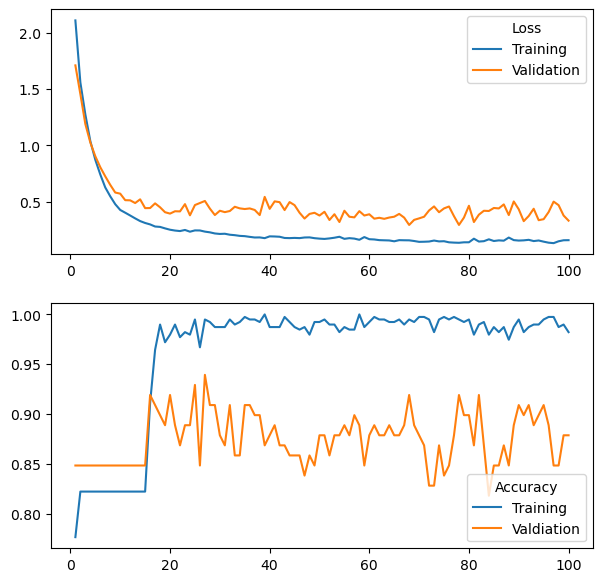

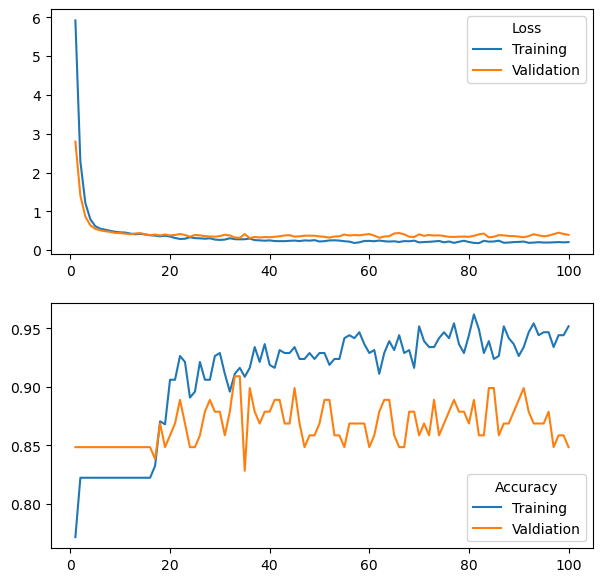

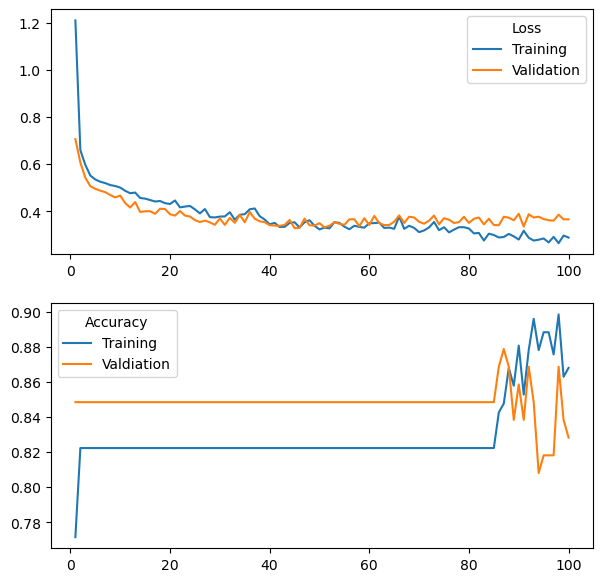

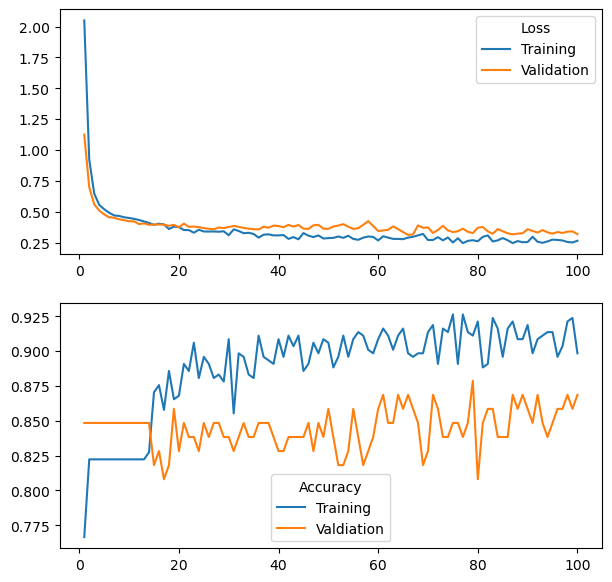

(None, None, None, None)

In [57]:
visualize_metrics(metric_dic), visualize_metrics(metric_dic2), visualize_metrics(metric_dic3), visualize_metrics(metric_dic4)

In [58]:
# adding the model names and results of the neural network to the dataframe
# [model_name, model_acc, model_enc_acc, model_log_acc, model_log_enc_acc]

model_name.append('Artificial Neural Network')
model_acc.append(ann_acc[1])
model_enc_acc.append(ann_acc_encoder[1])
model_log_acc.append(ann_acc_log[1])
model_log_enc_acc.append(ann_acc_log_enc[1])

In [59]:
final_results = pd.DataFrame(data = [model_acc, model_enc_acc, model_log_acc, model_log_enc_acc], 
             columns = model_name, index = ['Full Feature Accuracy','Encoded Feature Accuracy','Log Scaled Accuracy','Log Scaled Encoded Accuracy']).T

In [61]:
# final results <---
final_results.style.highlight_max(color = 'green')

,Full Feature Accuracy,Encoded Feature Accuracy,Log Scaled Accuracy,Log Scaled Encoded Accuracy
Naive Bayes Classifier,0.806452,0.346774,0.854839,0.637097
Random Forest Classifier,0.943548,0.854839,0.943548,0.830645
Gradient Boosting Classifier,0.919355,0.903226,0.927419,0.830645
XGradient Boost Classifier,0.959677,0.927419,0.959677,0.798387
Artificial Neural Network,0.895161,0.862903,0.846774,0.814516


In [76]:
index_names = ['Model Precision','Model Recall','Model ROC',
               'Model Encoded Precision', 'Model Encoded Recall','Model Encoded ROC', 
               'Model Log Precision',' Model Log Recall', 'Model Log ROC',
               'Model Log Encoded Precision', 'Model Log Encoded Recall', 'Model Log Encoded ROC']

final_performance = pd.DataFrame(data =
                                 [model_p, model_r, model_roc, 
                                    model_enc_p, model_enc_r, model_enc_roc,
                                    model_log_p, model_log_r, model_log_roc,
                                    model_log_enc_p, model_log_enc_r, model_log_enc_roc], columns = model_name, index = index_names).T

full_performance = pd.DataFrame(data = [model_p, model_r, model_roc], columns = model_name, index = ['Model Precision','Model Recall','Model ROC']).T

encoder_performance = pd.DataFrame(data = [model_enc_p, model_enc_r, model_enc_roc], columns = model_name, index = ['Model Encoded Precision', 'Model Encoded Recall','Model Encoded ROC']).T

log_performance = pd.DataFrame(data = [model_log_p, model_log_r, model_log_roc], columns = model_name, index = ['Model Log Precision',' Model Log Recall', 'Model Log ROC']).T

log_encoder_performance = pd.DataFrame(data = [model_log_enc_p, model_log_enc_r, model_log_enc_roc], columns = model_name, index = ['Model Log Encoded Precision', 'Model Log Encoded Recall', 'Model Log Encoded ROC']).T

In [85]:
full_performance.style.highlight_max(color = 'green', subset = ['Model ROC'])

,Model Precision,Model Recall,Model ROC
Naive Bayes Classifier,0.484848,0.695652,0.902282
Random Forest Classifier,1.000000,0.695652,0.968145
Gradient Boosting Classifier,0.842105,0.695652,0.962548
XGradient Boost Classifier,1.000000,0.782609,0.989238
Artificial Neural Network,0.708333,0.739130,0.944684


In [84]:
encoder_performance.style.highlight_max(color = 'green', subset = ['Model Encoded ROC'])

,Model Encoded Precision,Model Encoded Recall,Model Encoded ROC
Naive Bayes Classifier,0.221154,1.000000,0.900129
Random Forest Classifier,1.000000,0.217391,0.889798
Gradient Boosting Classifier,0.923077,0.521739,0.889798
XGradient Boost Classifier,0.818182,0.782609,0.950495
Artificial Neural Network,0.875000,0.304348,0.926819


In [83]:
log_performance.style.highlight_max(color = 'green', subset = ['Model Log ROC'])

,Model Log Precision,Model Log Recall,Model Log ROC
Naive Bayes Classifier,0.586207,0.739130,0.897546
Random Forest Classifier,1.000000,0.695652,0.966423
Gradient Boosting Classifier,0.850000,0.739130,0.962548
XGradient Boost Classifier,1.000000,0.782609,0.989238
Artificial Neural Network,0.571429,0.695652,0.906156


In [82]:
log_encoder_performance.style.highlight_max(color = 'green', subset = ['Model Log Encoded ROC'])

,Model Log Encoded Precision,Model Log Encoded Recall,Model Log Encoded ROC
Naive Bayes Classifier,0.328125,0.913043,0.808868
Random Forest Classifier,0.600000,0.260870,0.800689
Gradient Boosting Classifier,0.600000,0.260870,0.785192
XGradient Boost Classifier,0.428571,0.260870,0.809298
Artificial Neural Network,0.500000,0.391304,0.763237


In [63]:
final_performance.style.highlight_max(color = 'green', subset = ['Model ROC', 'Model Encoded ROC', 'Model Log ROC', 'Model Log Encoded ROC'])

,Model Precision,Model Recall,Model ROC,Model Encoded Precision,Model Encoded Recall,Model Encoded ROC,Model Log Precision,Model Log Recall,Model Log ROC,Model Log Encoded Precision,Model Log Encoded Recall,Model Log Encoded ROC
Naive Bayes Classifier,0.484848,0.695652,0.902282,0.221154,1.000000,0.900129,0.586207,0.739130,0.897546,0.328125,0.913043,0.808868
Random Forest Classifier,1.000000,0.695652,0.968145,1.000000,0.217391,0.889798,1.000000,0.695652,0.966423,0.600000,0.260870,0.800689
Gradient Boosting Classifier,0.842105,0.695652,0.962548,0.923077,0.521739,0.889798,0.850000,0.739130,0.962548,0.600000,0.260870,0.785192
XGradient Boost Classifier,1.000000,0.782609,0.989238,0.818182,0.782609,0.950495,1.000000,0.782609,0.989238,0.428571,0.260870,0.809298
Artificial Neural Network,0.708333,0.739130,0.944684,0.875000,0.304348,0.926819,0.571429,0.695652,0.906156,0.500000,0.391304,0.763237
